In [1]:
#import constrain.constrain as utils
import src.data.utils as utils

In [2]:
from src.data.utils import bioimager, imagingStation, nanophotometer, figures

In [3]:
import IPython.core.display

In [4]:
import os
import pathlib
import itertools
import string
import numpy as np
import pandas as pd
import pydna
import Bio
import Bio.SeqRecord
import Bio.Seq
import Bio.SeqFeature

In [5]:
#import subprocess
#
#cmd = "ls /Applications | grep '^CLC\ Main\ Workbench'"
#out = subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
#
#stdout,stderr = out.communicate()
#
#
#stdout = stdout.decode("utf-8"). rstrip("\n")
#stdout
#
#import re
#
#m = re.search('AAA(.+?)ZZZ', text)
#if m:
#    found = m.group(1)
#
#print(stdout.decode("utf-8"). rstrip("\n"))
#
#string = stdout.decode("utf-8") 

#cmd = "ls /Applications | grep '^CLC\ Main\ Workbench'""
#out = subprocess.Popen(['ls /Applications' |', 'grep', '^CLC\ Main\ Workbench'], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
#
#!ls /Applications | grep "^CLC\ Main\ Workbench"
##locate /Applications '^CLC\ Main\ Workbench\' -type d
#
#!ls /Applications/CLC\ Main\ Workbench\ 20

In [6]:
import pydna.editor
clc20 = pydna.editor.Editor("open -a CLC\ Main\ Workbench\ 20")
clc21 = pydna.editor.Editor("open -a CLC\ Main\ Workbench\ 21")
import pydna.primer
import pydna.dseqrecord
import pydna.amplify
import pydna.assembly
import pydna.gel
import pydna.ladders

In [7]:
export_csvs = False

In [8]:
# Sync odrive to gdrive
#!python ../src/data/syncExperimentalData.py

# Project

Debottlenecking the strictosidine module

Hypothesis
1. Specific combinations of CPR / G8H homologs and corresponding expression levels can remove the G8H bottleneck in the Strictosidine pathway

Aim: To test the hypothesis

Tasks
1. dgRNA
2. Base strain
3. **Library**
    - Homologs 9/10: different AA sequence
    - Expression 4/4
        - level: High low
        - timing: Early late (Compartmentalization)
     - Theoretical lib size: 1440
     - Characterization: ~ 250 Extracellular loganin
4. Phenotyping
5. Data analysis

# Library construction

## Design

Strictosidine module

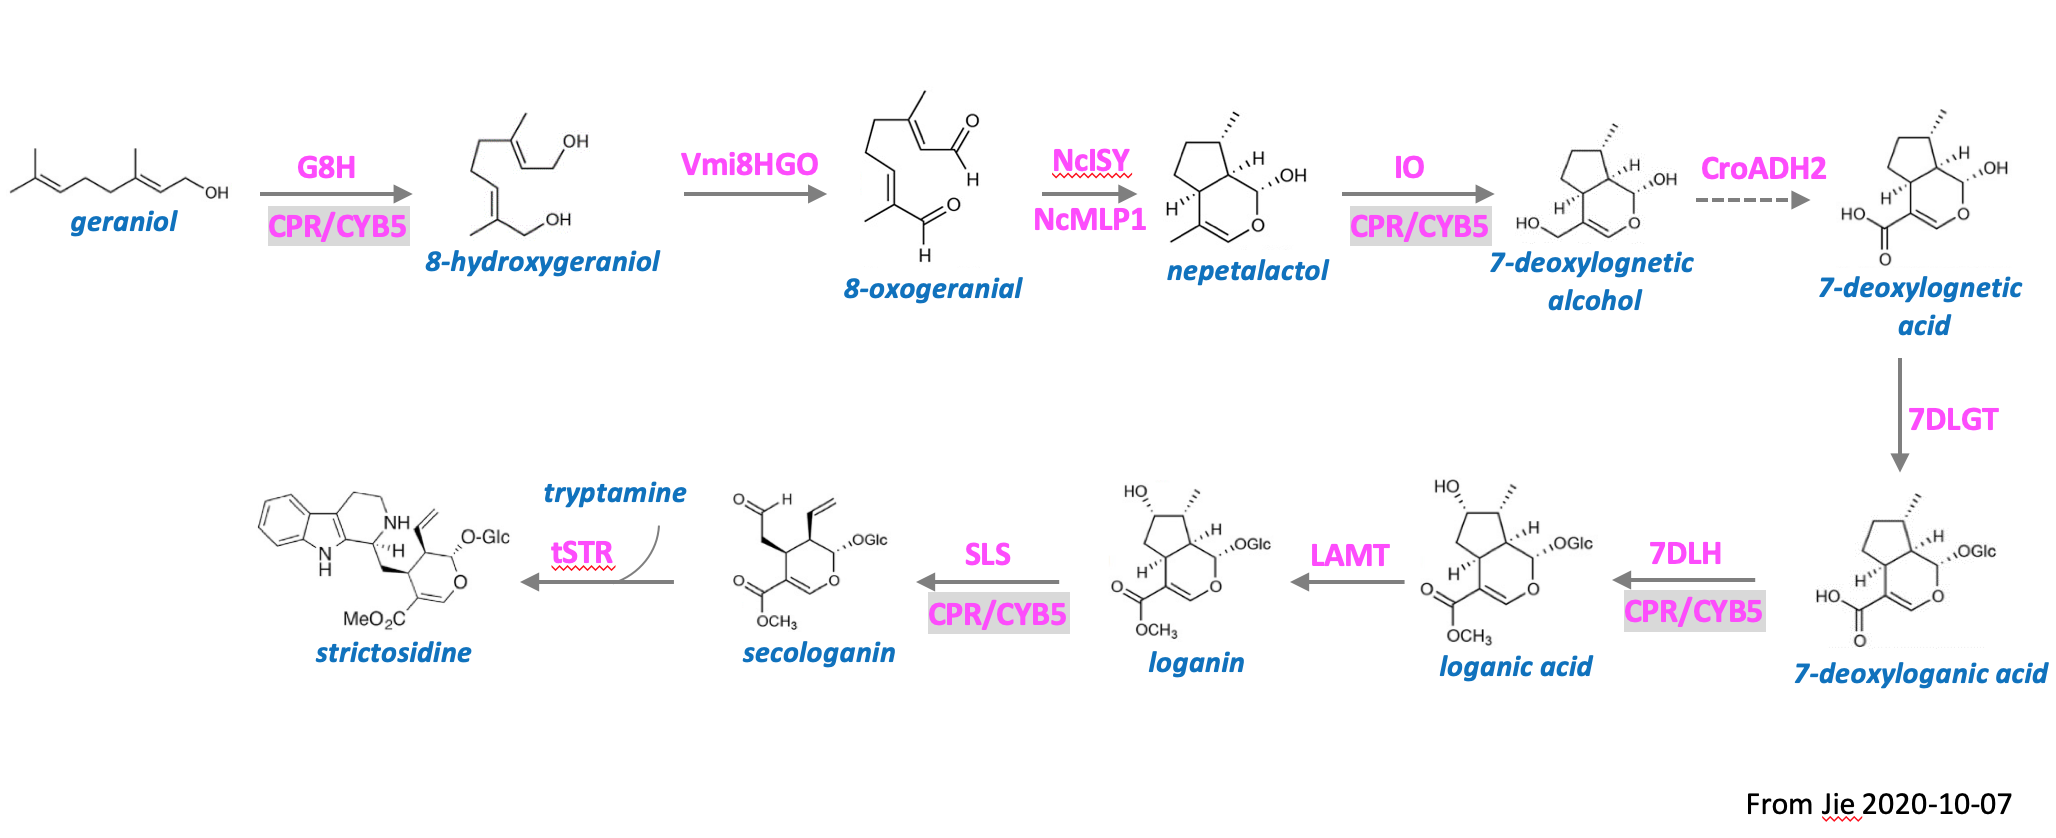

In [9]:
IPython.core.display.Image(figures / 'Pathway.png', width=800)

MIA-HA-1 10xCPR 4xpCPR 4x 9xG8H

In [10]:
figures / 'Pathway.png'

PosixPath('/Users/sorpet/projects/g8h_cpr_library/reports/figures/Pathway.png')

In [11]:
figures / 'library_design_1.png'

PosixPath('/Users/sorpet/projects/g8h_cpr_library/reports/figures/library_design_1.png')

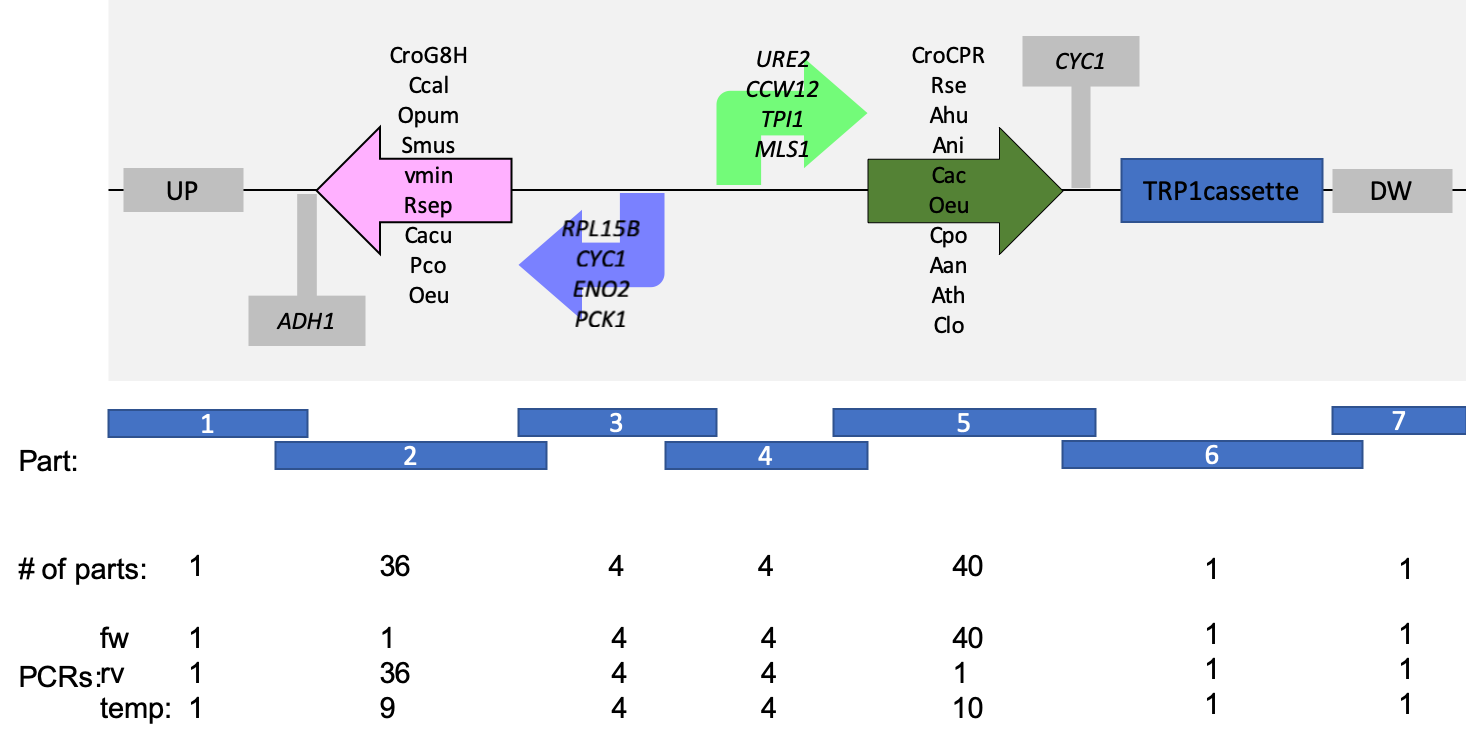

In [12]:
IPython.core.display.Image(figures / 'library_design_1.png', width=600)

Note on sequence homology: 
- As G8H and CPR parts have homology this library cannot be made in one transformation. Instead should be made in 9*10 individual transformation so as not to add two G8H or CPR homologs in one transformation mixtures.

- G8H PcoG8H is not available

## Background strain

MIA-HA-1

In [13]:
HA1 = utils.from_benchling("MIA-HA-1")
HA1.annotations['topology'] = "linear"

In [14]:
#clc20.open(HA1)
#clc21.open(HA1)
#Bio.SeqIO.write([HA1], "../data/raw/MIA-HA-1.gb", "genbank")

## gRNAs

pESC-URA-gRNA_XI2-2

In [15]:
pgRNA = utils.from_benchling("PL_12_I6_(pESC-URA-gRNA_XI2-2)")

In [16]:
pgRNA.name = "pESC-URA-gRNA_XI2-2"
pgRNA.annotations['batches'] = [{'location'    :'PL_12_I6',
                                 'volume'       : 40,
                                 'concentration': 250}]

In [17]:
XI2_2_gRNA = pydna.dseqrecord.Dseqrecord("ACCCCCCTCAACTGATCAAC", name = "XI2-2_gRNA")

## Repair templates

### What templates

names

In [18]:
G8H_template_names = ["pESC-CEN_RS-OeuG8H","PL_10_A1pMIA_JZ-40_CroG8H","pMIA_086_Rsep_G8O_in_p0057_(TRP)","pMIA_087_Vmin_G8O_in_p0057_(TRP)","pMIA_088_Opum_G8O_in_p0057_(TRP)","pMIA_089_Cacu_G8O_in_p0057_(TRP)","pMIA_090_Smus_G8O_in_p0057_(TRP)","pMIA_091_Ccal_G8O_in_p0057_(TRP)"]
pG8H_template_names = ['pCYC1','pENO2','pPCK1','pRPL15B']

CPR_template_names = ["pMIA_042_Cro_CPR_in_pRS415_USER_(leu)_-_TEF1","pMIA_048_(G2_Aan_CPR_(TEF1)_in_pRS415U_(LEU))","pMIA_055_ATR1_in_pRS415_USER_(leu)_-_TEF1","PL_13_E6_(pRS415U-P2_TEF1-CloCPR_opt2)","PL_13_E7_(pRS415U-P2_TEF1-RseCPR_opt2)","PL_13_E8_(pRS415U-P2_TEF1-AhuCPR_opt2)","PL_13_E9_(pRS415U-P2_TEF1-AniCPR_opt2)","PL_13_F1_(pRS415U-P2_TEF1-CacCPR_opt2)","PL_13_F2_(pRS415U-P2_TEF1-OeuCPR_opt2)","PL_13_F3_(pRS415U-P2_TEF1-CpoCPR_opt2)"]
pCPR_template_names = ['pCCW12','pMLS1','pTPI1','pURE2']

marker_template_names = ["pL_01_E8_(pRS414-USER-ccdB)"]

download

In [19]:
pG8H_templates = [utils.from_benchling(pname) for pname in pG8H_template_names]
G8H_templates = [utils.from_benchling(tname) for tname in G8H_template_names]

CPR_templates = [utils.from_benchling(tname) for tname in CPR_template_names]
pCPR_templates = [utils.from_benchling(pname) for pname in pCPR_template_names]

marker_templates = [utils.from_benchling(tname) for tname in marker_template_names]

Update template locations

In [20]:
#G8H_template_locations = ["Konrad plasmidbox_A6, Cryobox_A5", "PL_10_A1"    , "PL_13_E5"    , "lc_AT_C6"    , "lc_AT_C7"      , "lc_AT_C8"     ,"lc_AT_C9"      ,"lc_AT_D1"     ,"lc_AT_D2"]
#G8H_template_locations=["p1_H01", "p1_H02", "p1_H04", "p1_H05", "p1_H06", "p1_H07", "p1_H08", "p1_H09"]

#pG8H_template_locations = ['l4_A01'] * 4

#pCPR_template_locations = ['l4_A01'] * 4
#CPR_template_locations = ["p1_F06","p1_F07","p1_F08","p1_F09","p1_G01","p1_G02","p1_G03","p1_G04","p1_G05","p1_G06"]

#marker_cassette_template_locations = ['pL_01_E8']



Update locations

In [21]:
p_temp_loc = 'l4_A01'
#for loc, temp in zip(G8H_template_locations, G8H_templates):
    #temp.annotations['batches'] = [{'location':loc}]
    
for temp in pG8H_templates:
    temp.annotations["batches"] = [{'location':p_temp_loc, 'volume':20,'concentration:': 120}]

#for loc, temp in zip(CPR_template_locations, CPR_templates):
    #temp.annotations['location'] = loc
    
for temp in pCPR_templates:
    temp.annotations["batches"] = [{'location':p_temp_loc, 'volume':20,'concentration:': 120}]
    
for temp in marker_templates:
    temp.annotations["batches"] = [{'location':'pL_01_E8', 'volume':100,'concentration:': 40}]

'#### Template amplification sites

names

In [22]:
G8H_CDS_annotations = ["OeuG8O", "CroG8O", "Rsep_G8O_opt", "Vmin_G8O_opt", "Opum_G8O_opt", "Cacu_G8O_opt", "Smus_G8O_opt", "Ccal_G8O_opt"]
#G8H_terminator_annotations = ["T ADH1"] * 9
G8H_site_names = ["OeuG8H_tADH1", "CroG8H_tADH1", "RsepG8H_tADH", "Vmin_G8H_tADH1", "OpumG8H_tADH1", "CacuG8H_tADH1", "SmusG8_tADH1", "CcalG8_tADH1"]

pG8H_annotations = ['pCYC1','pENO2','pPCK1','pRPL15B']
pG8H_names = ['pCYC1','pENO2','pPCK1','pRPL15B']

pCPR_annotations = ['pCCW12','pMLS1','pTPI1','pURE2']
pCPR_names = ['pCCW12','pMLS1','pTPI1','pURE2']

CPR_CDS_annotations = ['Cro CPR', 'Aan CPR', 'ATR1 Arabidopsis CPR','CloCPR_opt2','RseCPR_opt2','AhuCPR_opt2','AniCPR_opt2','CacCPR_opt2','OeuCPR_opt2','CpoCPR_opt2']
#CPR_terminator_annotations = ["T CYC1"] * 10
CPR_site_names = ['CroCPR_tCYC1', 'AanCPR_tCYC1', 'AraCPR_tCYC1','CloCPR_tCYC1','RseCPR_tCYC1','AhuCPR_tCYC1','AniCPR_tCYC1','CacCPR_tCYC1','OeuCPR_tCYC1','CpoCPR_tCYC1']

marker_cassette_annotations = ["TRP1_marker"]
marker_cassette_names = ["cTRP1"]
#marker_cassette_site_names = ["TRP1casette"]

download

In [23]:
#strain: "BY4742" or "CENPK113-7d"
#isite_names: pd.read_csv("gRNAtable.csv", index_col="name")
UP_sites, DW_sites = utils.UPandDW(strain = "CENPK113-7d",isite_name="XI-2")
UP_sites[0].annotations['batches'] = [{'location':'l4_A01', 'volume':20,'concentration:': 120}]
DW_sites[0].annotations['batches'] = [{'location':'l4_A01', 'volume':20,'concentration': 120}]

extract sites

In [24]:
G8H_sites = utils.extract_template_amplification_sites1(G8H_templates, G8H_CDS_annotations, "T ADH1")
pG8H_sites =  utils.extract_sites1(pG8H_annotations, pG8H_templates, pG8H_names)
pG8H_sites =[site.reverse_complement(annotations=True,name=True) for site in pG8H_sites]

CPR_sites = utils.extract_template_amplification_sites1(CPR_templates, CPR_CDS_annotations, "T CYC1")
pCPR_sites = utils.extract_sites1(pCPR_annotations, pCPR_templates, pCPR_names)

marker_sites = utils.extract_sites1(marker_cassette_annotations, marker_templates, marker_cassette_names)

In [25]:
for site in marker_sites:
    print(site.annotations['batches'])

[{'location': 'pL_01_E8', 'volume': 100, 'concentration:': 40}]


Update site names

In [26]:
for name, site in zip(G8H_site_names, G8H_sites):
    site.name = name
for name, site in zip(pG8H_names, pG8H_sites):
    site.name = name
    
for name, site in zip(CPR_site_names, CPR_sites):
    site.name = name
for name, site in zip(pCPR_names, pCPR_sites):
    site.name = name

for name, site in zip(marker_cassette_names, marker_sites):
    site.name = name

'#### Determine primer sequences

from:  fragment list (7) containing parts lists (1,9,4,4,10,1,1 or variable) 

to  :  combinations list 7 fragments * x combinations (1440 or variable; matrix)

In [27]:
#Create a list of fragments within a list of parts.
fragment_list = [UP_sites,G8H_sites,pG8H_sites,pCPR_sites,CPR_sites,marker_sites,DW_sites]
#fragment_list = [[UP_sites[0]],[G8H_sites[1]],pG8H_sites,pCPR_sites,[CPR_sites[0]],[marker_sites[0]],[DW_sites[0]]]

#The number of fragments to be assembled
no_frags = len(fragment_list)
print("Number of fragments:", no_frags)

#The number of parts of each fragment
no_parts = [len(l) for l in fragment_list]
print("Number of parts: ",no_parts)

#The number of possible combinations
no_combs = utils.multiplyList(no_parts)
print("Number of possible combinations:",no_combs)

#How many repitions are needed?
repetition_list = [int(no_comb/no_part) for no_comb, no_part in zip([no_combs]*len(no_parts),no_parts)]
print("The number of time each fragment must be repeated:", repetition_list)

#Matrix with all combinations
print("\nCombinations:")
combinations_matrix = [t for t in itertools.product(*fragment_list)]
for row in combinations_matrix:
    names = []
    for element in row:
        names.append(element.name)
    #print(names)

Number of fragments: 7
Number of parts:  [1, 8, 4, 4, 10, 1, 1]
Number of possible combinations: 1280
The number of time each fragment must be repeated: [1280, 160, 320, 320, 128, 1280, 1280]

Combinations:


Upload strains to benchling. Create spreadsheets for
1. Benchling 
    1. add strain entities
    2. add sequence as plasmid entities

Add strain entities

In [ ]:
if export_csvs:
    cro_strain_entities.to_csv('cro_strain_entities.csv',index=False)

Determine fw, rv primer pair for each part i.e.

From: combinations matrix

To  : primers matrix of tuples (fw,rv)

In [28]:
lea_primers = pd.read_excel("../data/raw/G8H_CPR_library.xls", sheet_name = "all primers").reset_index(drop=True)
lea_primers.head()

,Id,Name,Target Parts,Size,Cost,Tm,Tm (3' only),Sequence (3' only),Sequence,Location
0,3460,PR_UP_tADH1_05,XI-2_UP,22,2.2,58.178,58.178,GAGGATTTTCGATGGAGC,GAGGATTTTCGATGGAGC,o2_I06
1,3461,PR_UP_tADH1_06,XI-2_UP,64,6.4,69.335,57.264,TTGTGGAAGTTCATGGC,TAGGTCAGGTTGCTTTCTCAGGTATAGCATGAGGTCGCTCTTGTGG...,o2_I07
2,3407,PR_G8H_01,"VminG8H_tADH1,SmusG8H_tADH1,RsepG8H_tADH1,Cacu...",19,1.9,57.335,57.335,GAGCGACCTCATGCTATAC,GAGCGACCTCATGCTATAC,op4_A10
3,3408,PR_G8H_02,"VminG8H_tADH1,TIS_AAAACA",62,6.2,63.653,57.979,ATGGATTACTTGACGATCGC,AGACACACAAACACAAATACACACACTAAATTAATAAAAACAATGG...,op4_A01
4,3409,PR_G8H_03,"VminG8H_tADH1,TIS_AAAACA",61,6.1,64.693,57.979,ATGGATTACTTGACGATCGC,ACACCAAGCAACTAATACTATAACATACAATAATAAAAACAATGGA...,op4_B01


In [29]:
lea_parts = pd.read_excel("../data/raw/G8H_CPR_library.xls", sheet_name = "all parts").reset_index(drop=True)
lea_parts.head()

,Overlaps_to,order,Part,Promoter,Id,Name,Note,Forward Oligo Id,Forward Oligo Name,Reverse Oligo Id,...,Q5_ta,Length,Sequence,Location,Template_location,Template_name,Box_barcode,volume,concentration,Column1
0,pCYC1,1,NaN,NaN,2339,PCR_G8H_01,PCR,3407,PR_G8H_01,3408,...,63,1845,GAGCGACCTCATGCTATACCTGAGAAAGCAACCTGACCTACAGGAA...,l5_A03,NaN,pMIA_087_Vmin_G8O_in_p0057_(TRP),81BOX762,100.0,40.0,NaN
1,pENO2,2,NaN,NaN,2340,PCR_G8H_02,PCR,3407,PR_G8H_01,3409,...,63,1844,GAGCGACCTCATGCTATACCTGAGAAAGCAACCTGACCTACAGGAA...,l5_A04,NaN,pMIA_087_Vmin_G8O_in_p0057_(TRP),81BOX762,100.0,45.0,NaN
2,pPCK1,3,NaN,NaN,2341,PCR_G8H_03,PCR,3407,PR_G8H_01,3410,...,63,1841,GAGCGACCTCATGCTATACCTGAGAAAGCAACCTGACCTACAGGAA...,l5_A05,NaN,pMIA_087_Vmin_G8O_in_p0057_(TRP),81BOX762,100.0,40.0,NaN
3,pRPL15B,4,NaN,NaN,2342,PCR_G8H_04,PCR,3407,PR_G8H_01,3411,...,63,1839,GAGCGACCTCATGCTATACCTGAGAAAGCAACCTGACCTACAGGAA...,l5_A06,NaN,pMIA_087_Vmin_G8O_in_p0057_(TRP),81BOX762,100.0,45.0,NaN
4,pCYC1,5,NaN,NaN,2343,PCR_G8H_05,PCR,3407,PR_G8H_01,3412,...,63,1851,GAGCGACCTCATGCTATACCTGAGAAAGCAACCTGACCTACAGGAA...,l5_A07,NaN,pMIA_090_Smus_G8O_in_p0057_(TRP),81BOX762,100.0,40.0,NaN


In [30]:
#Initialize matrix
primer_matrix = [[] for i in range(no_combs)]
for comb_no in range(0, no_combs):
    for frag_no in range(0, no_frags):
        comb_seq = str(combinations_matrix[comb_no][frag_no].seq.upper())
        #print(combinations_matrix[comb_no][frag_no].name)
        #print(comb_seq)
        if frag_no == 1:
            idx = frag_no + 1
        elif frag_no == 4:
            idx = frag_no - 1
        else:
            idx  = frag_no
        
        if idx != frag_no:
            name = combinations_matrix[comb_no][idx].name
            true_false = np.logical_and(lea_parts['Sequence'].str.contains(comb_seq), lea_parts['Overlaps_to'] == name)
        else:
            true_false = lea_parts['Sequence'].str.contains(comb_seq)
        
        #print(true_false.value_counts())

        comb_seq_idx = lea_parts[true_false].index
        #print(comb_seq_idx)

        forward_primer_name = lea_parts.loc[comb_seq_idx,['Forward Oligo Name']].values[0][0]
        reverse_primer_name = lea_parts.loc[comb_seq_idx,['Reverse Oligo Name']].values[0][0]
        
        forward_primer_idx  = lea_primers[lea_primers['Name'] == forward_primer_name].index
        forward_seq         = lea_primers.loc[forward_primer_idx,['Sequence']].values[0][0]
        forward_loc         = lea_primers.loc[forward_primer_idx,['Location']].values[0][0]
        forward_primer      = pydna.primer.Primer(pydna.dseqrecord.Dseqrecord(forward_seq, id = forward_primer_name))
        #forward_primer.annotations['location'] = forward_loc
        forward_primer.annotations['batches'] = []
        forward_primer.annotations['batches'].append({'location'      : forward_loc,
                                                      'volume'        : 100,
                                                      'concentration' : 10})
        reverse_primer_idx  = lea_primers[lea_primers['Name'] == reverse_primer_name].index
        reverse_seq         = lea_primers.loc[reverse_primer_idx,['Sequence']].values[0][0]
        reverse_loc         = lea_primers.loc[reverse_primer_idx,['Location']].values[0][0]
        reverse_primer      = pydna.primer.Primer(pydna.dseqrecord.Dseqrecord(reverse_seq, id = reverse_primer_name))
        #reverse_primer.annotations['location'] = reverse_loc
        reverse_primer.annotations['batches'] = []
        reverse_primer.annotations['batches'].append({'location'      : reverse_loc,
                                                      'volume'        : 100,
                                                      'concentration' : 10})
        
        primer_matrix[comb_no].append((forward_primer, reverse_primer))

Validate primer matrix by printing

In [31]:
primer_matrix_reshaped = [list(x) for x in zip(*primer_matrix)]

In [32]:
for frag_no, frag in enumerate(primer_matrix_reshaped):
    print("All primer pairs for fragment no: " + str(frag_no))
    #for frag_primer_pair in frag:
        #print(frag_primer_pair[0].id, "\t", frag_primer_pair[1].id)
    #print()

All primer pairs for fragment no: 0
All primer pairs for fragment no: 1
All primer pairs for fragment no: 2
All primer pairs for fragment no: 3
All primer pairs for fragment no: 4
All primer pairs for fragment no: 5
All primer pairs for fragment no: 6


Validate primer matrix by printing only different primers

In [33]:
primer_matrix_reshaped_no_duplicates = [utils.removeTupleDuplicates(lst) for lst in primer_matrix_reshaped]

In [34]:
len(primer_matrix_reshaped_no_duplicates[1])

32

In [35]:
for frag_no, frag in enumerate(primer_matrix_reshaped_no_duplicates):
    print("All primer pairs for fragment no: " + str(frag_no))
    #for frag_primer_pair in frag:
        #print(frag_primer_pair[0].id, "\t", frag_primer_pair[1].id)
    #print()

All primer pairs for fragment no: 0
All primer pairs for fragment no: 1
All primer pairs for fragment no: 2
All primer pairs for fragment no: 3
All primer pairs for fragment no: 4
All primer pairs for fragment no: 5
All primer pairs for fragment no: 6


Comments.
- All primer pairs for CPR contains 36 and not 40 pairs. This is because the four primers for RseCPR, CloCPR have the same sequence and the 4 and can be reused.
- Missing PR_CPR_05. Copy of PR_CPR_02 with additional t. Designed by mistake due to additional tCYC1 bp in template

In [36]:
lists_of_primers = []
# For each frag lst
for frag_no in range(0, no_frags):
    #From: list of tuples 
    #To  : list
    primers_tp = primer_matrix_reshaped_no_duplicates[frag_no]
    primers = [item for t in primers_tp for item in t]
    
    # From: list of primer
    # To: list of primers without sequence duplicates
    primers_no_dup = utils.recs_no_duplicates(primers)
    
    lists_of_primers.append(primers_no_dup)

In [37]:
primers = [item for sublist in lists_of_primers for item in sublist]
len(primers)

92

In [38]:
for primer in primers:
    print(primer.id, "\t", primer.annotations['batches'][0]['location'])

PR_UP_tADH1_05 	 o2_I06
PR_UP_tADH1_06 	 o2_I07
PR_G8H_01 	 op4_A10
PR_G8H_34 	 op4_A09
PR_G8H_16 	 op4_C04
PR_G8H_31 	 op4_B08
PR_G8H_33 	 op4_D08
PR_G8H_10 	 op4_A03
PR_G8H_17 	 op4_D04
PR_G8H_08 	 op4_C02
PR_G8H_18 	 op4_A05
PR_G8H_12 	 op4_C03
PR_G8H_37 	 op4_D09
PR_G8H_20 	 op4_C05
PR_G8H_24 	 op4_C06
PR_G8H_11 	 op4_B03
PR_G8H_30 	 op4_A08
PR_G8H_04 	 op4_C01
PR_G8H_05 	 op4_D01
PR_G8H_15 	 op4_B04
PR_G8H_09 	 op4_D02
PR_G8H_07 	 op4_B02
PR_G8H_13 	 op4_D03
PR_G8H_35 	 op4_B09
PR_G8H_23 	 op4_B06
PR_G8H_22 	 op4_A06
PR_G8H_32 	 op4_C08
PR_G8H_36 	 op4_C09
PR_G8H_19 	 op4_B05
PR_G8H_14 	 op4_A04
PR_G8H_21 	 op4_D05
PR_G8H_02 	 op4_A01
PR_G8H_06 	 op4_A02
PR_G8H_03 	 op4_B01
PR_G8H_25 	 op4_D06
PR_PRO_15 	 op4_H11
PR_PRO_16 	 op4_H12
PR_PRO_01 	 op4_A11
PR_PRO_02 	 op4_A12
PR_PRO_11 	 op4_F11
PR_PRO_12 	 op4_F12
PR_PRO_13 	 op4_G11
PR_PRO_14 	 op4_G12
PR_PRO_05 	 op4_C11
PR_PRO_06 	 op4_C12
PR_PRO_07 	 op4_D11
PR_PRO_08 	 op4_D12
PR_PRO_03 	 op4_B11
PR_PRO_04 	 op4_B12
PR_PRO_09 	 

### Primers (order)
- add primers to storage digitally
- receive primers, dissolve to 10 μM, note volume
- add primers to storage physical

### PCRs

- Simulate amplicons
- Add amplicons to to storage digitally
- Create pcrs, purify, estimate concentration and volume
- Add pcrs concentration and volume to storage digitally (Benchling batch information)
- Add pcrs to storage physical
- Retrieve pcrs concentration and volume from Benchling
- Restructure amplicons matrix to list of amplicons and amplicons

#### Simulate amplicons

In [39]:
combinations_matrix[0][0].name

'XI-2UP'

In [40]:
#Initizalise
amplicon_matrix = [[] for i in range(no_combs)]

for comb_no in range(0, no_combs):
    for frag_no in range(0, no_frags):
        template       = pydna.dseqrecord.Dseqrecord(combinations_matrix[comb_no][frag_no])

        forward_primer = primer_matrix[comb_no][frag_no][0]
        reverse_primer = primer_matrix[comb_no][frag_no][1]
        
        amplicon = pydna.amplify.pcr(forward_primer, reverse_primer,  template)
        
        amplicon.annotations['template_name'] = template.name
        #print(amplicon.annotations, template.annotations)
        #amplicon.annotations['template_location'] = template.annotations['batches'][0]['location']
        
        comb_seq = amplicon.seq.watson.upper()
        true_false = lea_parts['Sequence'].str.contains(comb_seq)
        comb_seq_idx = lea_parts[true_false].index
        
        amplicon_name  = lea_parts.loc[comb_seq_idx,['Name']].values[0][0]
        amplicon.name = amplicon_name
        
        amplicon_loc  = lea_parts.loc[comb_seq_idx,['Location']].values[0][0]
        amplicon_vol  = lea_parts.loc[comb_seq_idx,['volume']].values[0][0]
        amplicon_con  = lea_parts.loc[comb_seq_idx,['concentration']].values[0][0]
        amplicon.annotations['batches'] = []
        amplicon.annotations['batches'].append(  {'location'      : amplicon_loc,
                                                  'volume'        : amplicon_vol,
                                                  'concentration' : amplicon_con})
        
        amplicon.forward_primer.annotations['tm Q5 Hot Start'] = lea_parts.loc[comb_seq_idx,['Q5_fw_tm']].values[0][0]
        amplicon.reverse_primer.annotations['tm Q5 Hot Start'] = lea_parts.loc[comb_seq_idx,['Q5_rv_tm']].values[0][0]
        amplicon.annotations['ta Q5 Hot Start'] = lea_parts.loc[comb_seq_idx,['Q5_ta']].values[0][0]
        
        ## Remove additional wrong primer annotation added by pydna.amplify.pcr
        amplicon.features = [feat for feat in amplicon.features if feat.type != "primer_bind"]
        
        utils.seq_to_annotation(amplicon, amplicon, "PCR_product")
        utils.seq_to_annotation(forward_primer, amplicon, "primer_bind")
        utils.seq_to_annotation(reverse_primer, amplicon, "primer_bind")
        
        amplicon_matrix[comb_no].append(amplicon)

        #print(comb_seq)


In [41]:
amplicon_matrix[0][6].annotations['batches']

[{'location': 'l5_I09', 'volume': 100.0, 'concentration': 40.0}]

In [42]:
for amp in amplicon_matrix[0]:
    print(amp.name)
    print(amp.annotations['batches'])
    print(amp.template.annotations['batches'])
    print()

PCR_UP_tADH1_01
[{'location': 'l5_I08', 'volume': 100.0, 'concentration': 30.0}]
[{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}]

PCR_G8H_29
[{'location': 'l5_D04', 'volume': 100.0, 'concentration': 30.0}]
[{'box': 'p1', 'position': 'h1', 'volume': 100, 'concentration': 70, 'location': 'p1_h1'}]

PCR_PRO_01
[{'location': 'l4_C07', 'volume': 100.0, 'concentration': 100.0}]
[{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}]

PCR_PRO_02
[{'location': 'l4_C08', 'volume': 100.0, 'concentration': 100.0}]
[{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}]

PCR_CPR_31
[{'location': 'l5_E06', 'volume': 100.0, 'concentration': 30.0}]
[{'box': 'p1', 'position': 'f6', 'volume': 30, 'concentration': 470, 'location': 'p1_f6'}]

PCR_TRP1-DW_01
[{'location': 'l5_I07', 'volume': 100.0, 'concentration': 155.0}]
[{'location': 'pL_01_E8', 'volume': 100, 'concentration:': 40}]

PCR_TRP1-DW_02
[{'location': 'l5_I09', 'volume': 100.0, 'concentration': 40.0}]
[{'location': 

In [43]:
#for comb_no in range(0, no_combs):
#    for frag_no in range(0, no_frags):
#        if amplicon_matrix[comb_no][frag_no].name == 'PCR_UP_tADH1_01':
#            amplicon_matrix[comb_no][frag_no].annotations['batches'][0]['concentration'] = 30
#        elif amplicon_matrix[comb_no][frag_no].name == 'PCR_TRP1-DW_02':
#            amplicon_matrix[comb_no][frag_no].annotations['batches'][0]['concentration'] = 155
#        elif amplicon_matrix[comb_no][frag_no].name == 'PCR_TRP1-DW_01':
#            amplicon_matrix[comb_no][frag_no].annotations['batches'][0]['concentration'] = 40
            

Validate amplicon matrix by printing

In [44]:
amplicon_matrix_reshaped = [list(x) for x in zip(*amplicon_matrix)]

[Amplicon(609),
 Amplicon(1845),
 Amplicon(1033),
 Amplicon(1023),
 Amplicon(2364),
 Amplicon(1451),
 Amplicon(599)]

In [45]:
#for frag_list_no, frag_list in enumerate(amplicon_matrix_reshaped):
#    print("All primer pairs for fragment no: " + str(frag_list_no))
#    for frag in frag_list:
#        print(frag.name)
#    print()

Validate amplicon matrix by printing only different ampllicons

In [46]:
amplicon_matrix_reshaped_no_duplicates = [utils.recs_no_duplicates(lst) for lst in amplicon_matrix_reshaped]

In [47]:
for frag_list_no, frag_list in enumerate(amplicon_matrix_reshaped_no_duplicates):
    print("All parts for fragment no: " + str(frag_list_no))
    for frag in frag_list:
        print(frag.name)
    print()

All parts for fragment no: 0
PCR_UP_tADH1_01

All parts for fragment no: 1
PCR_G8H_29
PCR_G8H_30
PCR_G8H_31
PCR_G8H_32
PCR_G8H_21
PCR_G8H_22
PCR_G8H_23
PCR_G8H_24
PCR_G8H_09
PCR_G8H_10
PCR_G8H_11
PCR_G8H_12
PCR_G8H_01
PCR_G8H_02
PCR_G8H_03
PCR_G8H_04
PCR_G8H_17
PCR_G8H_18
PCR_G8H_19
PCR_G8H_20
PCR_G8H_13
PCR_G8H_14
PCR_G8H_15
PCR_G8H_16
PCR_G8H_05
PCR_G8H_06
PCR_G8H_07
PCR_G8H_08
PCR_G8H_33
PCR_G8H_34
PCR_G8H_35
PCR_G8H_36

All parts for fragment no: 2
PCR_PRO_01
PCR_PRO_06
PCR_PRO_07
PCR_PRO_08

All parts for fragment no: 3
PCR_PRO_02
PCR_PRO_03
PCR_PRO_04
PCR_PRO_05

All parts for fragment no: 4
PCR_CPR_31
PCR_CPR_40
PCR_CPR_33
PCR_CPR_39
PCR_CPR_32
PCR_CPR_36
PCR_CPR_37
PCR_CPR_38
PCR_CPR_34
PCR_CPR_35
PCR_CPR_21
PCR_CPR_30
PCR_CPR_23
PCR_CPR_29
PCR_CPR_22
PCR_CPR_26
PCR_CPR_27
PCR_CPR_28
PCR_CPR_24
PCR_CPR_25
PCR_CPR_11
PCR_CPR_20
PCR_CPR_13
PCR_CPR_19
PCR_CPR_12
PCR_CPR_16
PCR_CPR_17
PCR_CPR_18
PCR_CPR_14
PCR_CPR_15
PCR_CPR_01
PCR_CPR_10
PCR_CPR_03
PCR_CPR_09
PCR_CPR_02
PCR_CPR_06

Print list of amplicons

In [48]:
amplicons = [item for sublist in amplicon_matrix_reshaped_no_duplicates for item in sublist]
len(amplicons)

83

In [49]:
amplicons[0].template.annotations

{'batches': [{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}],
 'molecule_type': 'DNA'}

In [50]:
for amplicon in amplicons:
    print(amplicon.name, "\t", amplicon.annotations['batches'][0]['location'])

PCR_UP_tADH1_01 	 l5_I08
PCR_G8H_29 	 l5_D04
PCR_G8H_30 	 l5_D05
PCR_G8H_31 	 l5_D06
PCR_G8H_32 	 l5_D07
PCR_G8H_21 	 l5_C05
PCR_G8H_22 	 l5_C06
PCR_G8H_23 	 l5_C07
PCR_G8H_24 	 l5_C08
PCR_G8H_09 	 l5_B02
PCR_G8H_10 	 l5_B03
PCR_G8H_11 	 l5_B04
PCR_G8H_12 	 l5_B05
PCR_G8H_01 	 l5_A03
PCR_G8H_02 	 l5_A04
PCR_G8H_03 	 l5_A05
PCR_G8H_04 	 l5_A06
PCR_G8H_17 	 l5_C01
PCR_G8H_18 	 l5_C02
PCR_G8H_19 	 l5_C03
PCR_G8H_20 	 l5_C04
PCR_G8H_13 	 l5_B06
PCR_G8H_14 	 l5_B07
PCR_G8H_15 	 l5_B08
PCR_G8H_16 	 l5_B09
PCR_G8H_05 	 l5_A07
PCR_G8H_06 	 l5_A08
PCR_G8H_07 	 l5_A09
PCR_G8H_08 	 l5_B01
PCR_G8H_33 	 l5_D08
PCR_G8H_34 	 l5_D09
PCR_G8H_35 	 l5_E01
PCR_G8H_36 	 l5_E02
PCR_PRO_01 	 l4_C07
PCR_PRO_06 	 l4_D03
PCR_PRO_07 	 l4_D04
PCR_PRO_08 	 l4_D05
PCR_PRO_02 	 l4_C08
PCR_PRO_03 	 l4_C09
PCR_PRO_04 	 l4_D01
PCR_PRO_05 	 l4_D02
PCR_CPR_31 	 l5_E06
PCR_CPR_40 	 l5_F01
PCR_CPR_33 	 l5_F05
PCR_CPR_39 	 l5_F09
PCR_CPR_32 	 l5_G04
PCR_CPR_36 	 l5_G08
PCR_CPR_37 	 l5_H03
PCR_CPR_38 	 l5_H07
PCR_CPR_34 	 l5

In [146]:
#list(range(1,8))
#
#assembly_names = []
#for g_no in range(1,9):
#    for gp_no in range(1,5):
#        for cp_no in range(1,5):
#            for c_no in range(1,11):
#                assembly_names.append(str(g_no) +"_"+ str(gp_no) +"_"+ str(cp_no) +"_"+ str(c_no))
#                
#
#len(assembly_names)
#
#parameters = {
#'bg_strain': HA1,
#'site_names': ["XI_2"],
#'gRNAs': [XI2_2_gRNA],
##'parts': [flat_cro_combinations_matrix[0]],
#'assembly_limits':[30],
##'assembly_names': ["pCYC1_pURE2"],
#'verbose': False,
#'to_benchling': False  
#}
#
#assemble_strains = True
#
#if assemble_strains:
#    assemblies = []
#    for i, name in enumerate(assembly_names):
#        assembly = utils.casembler(**{'parts'          : [amplicon_matrix[i]],
#                                      'assembly_names' : [name], 
#                                       **parameters})
#        assemblies.append(assembly)
#    assemblies
#    
#    #HA2 = assemblies[0]
#    
#    #clc20.open(HA2)
#
#clc20.open(assemblies[811])
#
#assembly_names[811]
#
#possible_genotypes = pathlib.Path('../data/processed/sequence/possible_genotypes_by_promoter/').resolve()
#possible_genotypes
#
#possible_genotypes
#
#for assembly in assemblies:
#    name_ext = assembly.name + ".gbk"
#    path = possible_genotypes / pathlib.Path(name_ext)
#    assembly.write(str(path))

test.gbk

In [51]:
#Checking that all concentrations have been saved properly 
#for amplicon in amplicons:
    #print(amplicon.name, "\t", amplicon.annotations['batches'][0]['concentration'])

In [52]:
pol = 'Q5 Hot Start'
for amplicon in amplicons:
    amplicon.annotations['polymerase'] = pol
    amplicon = utils.det_proc_speed(amplicon)
    amplicon = utils.det_elon_time(amplicon)

In [53]:
#amplicons[0].template.annotations

In [54]:
#Determine tms and tas for amplicons (added to G8H_CPR_library.xls for quick loading)
#
#pol = 'Q5 Hot Start'
#for amplicon in amplicons:
#    amplicon = utils.neb_tm_calculator(amplicon, pol)
#
#amp_names = []
#fw_tms    = []
#rv_tms    = []
#tas       = []
#
#amplicons[0].forward_primer.annotations
#
#for amplicon in amplicons:
#    amp_names.append(amplicon.name)
#    fw_tms.append(amplicon.forward_primer.annotations['tm ' + pol])
#    rv_tms.append(amplicon.reverse_primer.annotations['tm ' + pol])
#    tas.append(amplicon.annotations['ta ' + pol])
#
#list_of_tuples = list(zip(amp_names, fw_tms, rv_tms, tas))
#
#df = pd.DataFrame(list_of_tuples, columns = ['amp_names', 'fw_tms', 'rv_tms', 'tas'])
#
#df.to_csv("test.csv",index=False)

#### Add amplicons to storage digitally
- to_benchling...

#### Create physical pcrs, purify, estimate concentration and volume

PCR
- Polymerase: Q5 2x MasterMix [protocol](https://international.neb.com/protocols/2012/08/30/protocol-for-q5-hot-start-high-fidelity-2x-master-mix-m0494)
- Program: Create according to protocol
- Elongation time: 1.5 min (30 s/ kb)
- Annealing temp 58
    - All primers are designed to have 3' Tm 59C-54C, and Ta 59C-62C when using  Q5 2x MasterMix (calculated with NEB Tm calculator)

In [55]:
longest_amplicon = 0
for parts in amplicon_matrix_reshaped_no_duplicates:
    for amp in parts:
        if len(amp) > longest_amplicon: longest_amplicon = len(amp)
print("Length of longest amplicon: \t" + str(longest_amplicon) + " bp")
print("Elongation time: \t\t"  + str(round(longest_amplicon/1000 * 35,1))+ " seconds")

Length of longest amplicon: 	2369 bp
Elongation time: 		82.9 seconds


In [56]:
# annealing temp: double check. Lea writes 59. 57 maybe fine. most cases amplification from plasmid
# annealing time: 10–30 seconds -> increase a bit from 10s
# elongation time: 0:27 seconds -> increase to 1:30 seconds
#amplicon_matrix[0][4].dbd_program() #.dbd_program

In [57]:
for a in amplicon_matrix_reshaped_no_duplicates[4]:
    print(a.name, len(a))

PCR_CPR_31 2364
PCR_CPR_40 2334
PCR_CPR_33 2298
PCR_CPR_39 2364
PCR_CPR_32 2364
PCR_CPR_36 2364
PCR_CPR_37 2304
PCR_CPR_38 2346
PCR_CPR_34 2346
PCR_CPR_35 2259
PCR_CPR_21 2369
PCR_CPR_30 2339
PCR_CPR_23 2303
PCR_CPR_29 2369
PCR_CPR_22 2369
PCR_CPR_26 2369
PCR_CPR_27 2309
PCR_CPR_28 2351
PCR_CPR_24 2351
PCR_CPR_25 2264
PCR_CPR_11 2364
PCR_CPR_20 2334
PCR_CPR_13 2298
PCR_CPR_19 2364
PCR_CPR_12 2364
PCR_CPR_16 2364
PCR_CPR_17 2304
PCR_CPR_18 2346
PCR_CPR_14 2346
PCR_CPR_15 2259
PCR_CPR_01 2365
PCR_CPR_10 2335
PCR_CPR_03 2299
PCR_CPR_09 2365
PCR_CPR_02 2365
PCR_CPR_06 2365
PCR_CPR_07 2305
PCR_CPR_08 2347
PCR_CPR_04 2347
PCR_CPR_05 2260


Lane no. 2 has bands ~1400bp. This is PcoG8H that are shorter than other G8H
Investigate via:
- amplicon_matrix_reshaped_no_duplicates
- amplicon_matrix_reshaped_no_duplicates[1][9].name
- amplicon_matrix_reshaped_no_duplicates[1][9].name
- amplicon_matrix_reshaped_no_duplicates[1][9].annotations['template_name']

Design PCR plate:

- Locations and amounts (each well ~20x 50 µl PCR reactions):
    - amplicons
    - templates          >= 20 µl, 10-20 ng/ul
    - fw_primers         >= 75 µl, 10 µM total
    - rv_primers         >= 75 µl, 10 µM total
    - fw_and_rv_primers  >= 100 µl, 10 µM total (5 µM each)

Comments:
- Check whether templates p1_H01 and p1_H03 are missing
- Add plates to benchling, get ID and add ID to plates in freezer
- Check and create Q5 hot start MM PCR program

In [58]:
plate_locations = []
for amplicon in amplicons:
    plate_locations.append([amplicon.name, 
                            amplicon.annotations['batches'][0]['location'],
                            amplicon.annotations['template_name'],
                            amplicon.template.annotations['batches'][0]['location'],
                            amplicon.forward_primer.id,
                            amplicon.forward_primer.annotations['batches'][0]['location'],
                            amplicon.reverse_primer.id,
                            amplicon.reverse_primer.annotations['batches'][0]['location']
                           ])
amplicon_df = pd.DataFrame(plate_locations, columns=['name', 'location','template_name','template_location','fw_name','fw_location','rv_name','rv_location'])
amplicon_df = amplicon_df.set_index('name')

map_name_plocation = pd.read_csv("../data/raw/mapping PCR name to plate location.csv").set_index('name') #mapping: PCR plate location to PCR name
amplicon_df = pd.concat([amplicon_df, map_name_plocation], axis=1, join="outer")
amplicon_df.index.names = ['name']
amplicon_df = amplicon_df.reset_index()
amplicon_df = amplicon_df.sort_values(by=['prow', 'pcol'])
amplicon_df.head()

,name,location,template_name,template_location,fw_name,fw_location,rv_name,rv_location,prow,pcol
13,PCR_G8H_01,l5_A03,Vmin_G8H_tADH1,p1_h5,PR_G8H_01,op4_A10,PR_G8H_02,op4_A01,A,1
25,PCR_G8H_05,l5_A07,SmusG8_tADH1,p1_h8,PR_G8H_01,op4_A10,PR_G8H_06,op4_A02,A,2
9,PCR_G8H_09,l5_B02,RsepG8H_tADH,p1_h4,PR_G8H_01,op4_A10,PR_G8H_10,op4_A03,A,3
21,PCR_G8H_13,l5_B06,CacuG8H_tADH1,p1_h7,PR_G8H_01,op4_A10,PR_G8H_14,op4_A04,A,4
17,PCR_G8H_17,l5_C01,OpumG8H_tADH1,p1_h6,PR_G8H_01,op4_A10,PR_G8H_18,op4_A05,A,5


Template:
- name

In [59]:
utils.plate_plot(amplicon_df, 'name')

name                                                              \
pcol          1           2           3           4           5           6    
prow                                                                           
A     PCR_G8H_01  PCR_G8H_05  PCR_G8H_09  PCR_G8H_13  PCR_G8H_17  PCR_G8H_21   
B     PCR_G8H_02  PCR_G8H_06  PCR_G8H_10  PCR_G8H_14  PCR_G8H_18  PCR_G8H_22   
C     PCR_G8H_03  PCR_G8H_07  PCR_G8H_11  PCR_G8H_15  PCR_G8H_19  PCR_G8H_23   
D     PCR_G8H_04  PCR_G8H_08  PCR_G8H_12  PCR_G8H_16  PCR_G8H_20  PCR_G8H_24   
E     PCR_CPR_01  PCR_CPR_10  PCR_CPR_03  PCR_CPR_09  PCR_CPR_02  PCR_CPR_06   
F     PCR_CPR_11  PCR_CPR_20  PCR_CPR_13  PCR_CPR_19  PCR_CPR_12  PCR_CPR_16   
G     PCR_CPR_21  PCR_CPR_30  PCR_CPR_23  PCR_CPR_29  PCR_CPR_22  PCR_CPR_26   
H     PCR_CPR_31  PCR_CPR_40  PCR_CPR_33  PCR_CPR_39  PCR_CPR_32  PCR_CPR_36   

                                                                             
pcol          7           8           9                10          11    12  
prow                                                                         
A     PCR_G8H_25  PCR_G8H_29  PCR_G8H_33  PCR_UP_tADH1_01  PCR_PRO_01  NaN1  
B     PCR_G8H_26  PCR_G8H_30  PCR_G8H_34   PCR_TRP1-DW_02  PCR_PRO_02  NaN2  
C     PCR_G8H_27  PCR_G8H_31  PCR_G8H_35   PCR_TRP1-DW_01  PCR_PRO_03  NaN3  
D     PCR_G8H_28  PCR_G8H_32  PCR_G8H_36             NaN4  PCR_PRO_04  NaN5  
E     PCR_CPR_07  PCR_CPR_08  PCR_CPR_04       PCR_CPR_05  PCR_PRO_05  NaN6  
F     PCR_CPR_17  PCR_CPR_18  PCR_CPR_14       PCR_CPR_15  PCR_PRO_06  NaN7  
G     PCR_CPR_27  PCR_CPR_28  PCR_CPR_24       PCR_CPR_25  PCR_PRO_07  NaN8  
H     PCR_CPR_37  PCR_CPR_38  PCR_CPR_34       PCR_CPR_35  PCR_PRO_08  NaN9

Template:
- name
- location

In [60]:
utils.plate_plot(amplicon_df, 'template_name')

template_name                                             \
pcol              1             2             3              4    
prow                                                              
A     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
B     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
C     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
D     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
E       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   
F       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   
G       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   
H       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   

                                                                             \
pcol             5             6             7             8             9    
prow                                                                          
A     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
B     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
C     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
D     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
E      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   
F      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   
G      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   
H      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   

                                  
pcol            10       11   12  
prow                              
A           XI-2UP    pCYC1  NaN  
B           XI-2DW   pCCW12  NaN  
C            cTRP1    pMLS1  NaN  
D              NaN    pTPI1  NaN  
E     CpoCPR_tCYC1    pURE2  NaN  
F     CpoCPR_tCYC1    pENO2  NaN  
G     CpoCPR_tCYC1    pPCK1  NaN  
H     CpoCPR_tCYC1  pRPL15B  NaN

In [61]:
utils.plate_plot(amplicon_df, 'template_location')

template_location                                                   \
pcol                1      2      3      4      5      6      7      8    
prow                                                                      
A                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
B                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
C                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
D                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
E                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   
F                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   
G                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   
H                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   

                                    
pcol     9         10      11   12  
prow                                
A     p1_h9    l4_A01  l4_A01  NaN  
B     p1_h9    l4_A01  l4_A01  NaN  
C     p1_h9  pL_01_E8  l4_A01  NaN  
D     p1_h9       NaN  l4_A01  NaN  
E     p1_g5     p1_g6  l4_A01  NaN  
F     p1_g5     p1_g6  l4_A01  NaN  
G     p1_g5     p1_g6  l4_A01  NaN  
H     p1_g5     p1_g6  l4_A01  NaN

fw_primer
- name
- location

In [62]:
utils.plate_plot(amplicon_df, 'fw_name')

fw_name                                                         \
pcol         1          2          3          4          5          6    
prow                                                                     
A     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
B     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
C     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
D     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
E     PR_CPR_01  PR_CPR_11  PR_CPR_04  PR_CPR_03  PR_CPR_03  PR_CPR_08   
F     PR_CPR_12  PR_CPR_20  PR_CPR_14  PR_CPR_13  PR_CPR_13  PR_CPR_17   
G     PR_CPR_21  PR_CPR_29  PR_CPR_23  PR_CPR_22  PR_CPR_22  PR_CPR_26   
H     PR_CPR_30  PR_CPR_38  PR_CPR_32  PR_CPR_31  PR_CPR_31  PR_CPR_35   

                                                                       
pcol         7          8          9               10         11   12  
prow                                                                   
A           NaN  PR_G8H_01  PR_G8H_01  PR_UP_tADH1_05  PR_PRO_01  NaN  
B           NaN  PR_G8H_01  PR_G8H_01   PR_TRP1-DW_05  PR_PRO_03  NaN  
C           NaN  PR_G8H_01  PR_G8H_01   PR_TRP1-DW_01  PR_PRO_05  NaN  
D           NaN  PR_G8H_01  PR_G8H_01             NaN  PR_PRO_07  NaN  
E     PR_CPR_09  PR_CPR_10  PR_CPR_06       PR_CPR_07  PR_PRO_09  NaN  
F     PR_CPR_18  PR_CPR_19  PR_CPR_15       PR_CPR_16  PR_PRO_11  NaN  
G     PR_CPR_27  PR_CPR_28  PR_CPR_24       PR_CPR_25  PR_PRO_13  NaN  
H     PR_CPR_36  PR_CPR_37  PR_CPR_33       PR_CPR_34  PR_PRO_15  NaN

In [63]:
utils.plate_plot(amplicon_df, 'fw_location')

fw_location                                                        \
pcol          1        2        3        4        5        6        7    
prow                                                                     
A        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
B        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
C        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
D        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
E        op4_E01  op4_E02  op4_E03  op4_E04  op4_E04  op4_E06  op4_E07   
F        op4_F01  op4_F02  op4_F03  op4_F04  op4_F04  op4_F06  op4_F07   
G        op4_G01  op4_G02  op4_G03  op4_G04  op4_G04  op4_G06  op4_G07   
H        op4_H01  op4_H02  op4_H03  op4_H04  op4_H04  op4_H06  op4_H07   

                                               
pcol       8        9        10       11   12  
prow                                           
A     op4_A10  op4_A10   o2_I06  op4_A11  NaN  
B     op4_A10  op4_A10   o2_I08  op4_B11  NaN  
C     op4_A10  op4_A10  op4_C10  op4_C11  NaN  
D     op4_A10  op4_A10      NaN  op4_D11  NaN  
E     op4_E08  op4_E09  op4_E10  op4_E11  NaN  
F     op4_F08  op4_F09  op4_F10  op4_F11  NaN  
G     op4_G08  op4_G09  op4_G10  op4_G11  NaN  
H     op4_H08  op4_H09  op4_H10  op4_H11  NaN

rv_primer
- name
- location

In [64]:
utils.plate_plot(amplicon_df, 'rv_name')

rv_name                                                         \
pcol         1          2          3          4          5          6    
prow                                                                     
A     PR_G8H_02  PR_G8H_06  PR_G8H_10  PR_G8H_14  PR_G8H_18  PR_G8H_22   
B     PR_G8H_03  PR_G8H_07  PR_G8H_11  PR_G8H_15  PR_G8H_19  PR_G8H_23   
C     PR_G8H_04  PR_G8H_08  PR_G8H_12  PR_G8H_16  PR_G8H_20  PR_G8H_24   
D     PR_G8H_05  PR_G8H_09  PR_G8H_13  PR_G8H_17  PR_G8H_21  PR_G8H_25   
E     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   
F     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   
G     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   
H     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   

                                                                       
pcol         7          8          9               10         11   12  
prow                                                                   
A           NaN  PR_G8H_30  PR_G8H_34  PR_UP_tADH1_06  PR_PRO_02  NaN  
B           NaN  PR_G8H_31  PR_G8H_35   PR_TRP1-DW_06  PR_PRO_04  NaN  
C           NaN  PR_G8H_32  PR_G8H_36   PR_TRP1-DW_02  PR_PRO_06  NaN  
D           NaN  PR_G8H_33  PR_G8H_37             NaN  PR_PRO_08  NaN  
E     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_10  NaN  
F     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_12  NaN  
G     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_14  NaN  
H     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_16  NaN

In [65]:
utils.plate_plot(amplicon_df, 'rv_location')

rv_location                                                        \
pcol          1        2        3        4        5        6        7    
prow                                                                     
A        op4_A01  op4_A02  op4_A03  op4_A04  op4_A05  op4_A06      NaN   
B        op4_B01  op4_B02  op4_B03  op4_B04  op4_B05  op4_B06      NaN   
C        op4_C01  op4_C02  op4_C03  op4_C04  op4_C05  op4_C06      NaN   
D        op4_D01  op4_D02  op4_D03  op4_D04  op4_D05  op4_D06      NaN   
E        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   
F        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   
G        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   
H        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   

                                               
pcol       8        9        10       11   12  
prow                                           
A     op4_A08  op4_A09   o2_I07  op4_A12  NaN  
B     op4_B08  op4_B09   o2_I09  op4_B12  NaN  
C     op4_C08  op4_C09  op4_D10  op4_C12  NaN  
D     op4_D08  op4_D09      NaN  op4_D12  NaN  
E     op4_B10  op4_B10  op4_B10  op4_E12  NaN  
F     op4_B10  op4_B10  op4_B10  op4_F12  NaN  
G     op4_B10  op4_B10  op4_B10  op4_G12  NaN  
H     op4_B10  op4_B10  op4_B10  op4_H12  NaN

In [66]:
utils.pcr_locations1(amplicons)

,location,name,template,fw,rv
0,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
1,p1_h1,PCR_G8H_29,p1_h1,op4_A10,op4_A08
2,p1_h1,PCR_G8H_30,p1_h1,op4_A10,op4_B08
3,p1_h1,PCR_G8H_31,p1_h1,op4_A10,op4_C08
4,p1_h1,PCR_G8H_32,p1_h1,op4_A10,op4_D08
...,...,...,...,...,...
78,p1_g4,PCR_CPR_08,p1_g4,op4_E08,op4_B10
79,p1_g5,PCR_CPR_04,p1_g5,op4_E09,op4_B10
80,p1_g6,PCR_CPR_05,p1_g6,op4_E10,op4_B10
81,pL_01_E8,PCR_TRP1-DW_01,pL_01_E8,op4_C10,op4_D10


In [67]:
utils.volumes(vol_p_reac = 20, 
        no_of_reactions = 100,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_100_reac
Template,0.4,40.0
Primer 1,1.0,100.0
Primer 2,1.0,100.0
H20,7.6,760.0
Pol,10.0,1000.0
Total,20.0,2000.0


In [68]:
amplicon_df

,name,location,template_name,template_location,fw_name,fw_location,rv_name,rv_location,prow,pcol
13,PCR_G8H_01,l5_A03,Vmin_G8H_tADH1,p1_h5,PR_G8H_01,op4_A10,PR_G8H_02,op4_A01,A,1
25,PCR_G8H_05,l5_A07,SmusG8_tADH1,p1_h8,PR_G8H_01,op4_A10,PR_G8H_06,op4_A02,A,2
9,PCR_G8H_09,l5_B02,RsepG8H_tADH,p1_h4,PR_G8H_01,op4_A10,PR_G8H_10,op4_A03,A,3
21,PCR_G8H_13,l5_B06,CacuG8H_tADH1,p1_h7,PR_G8H_01,op4_A10,PR_G8H_14,op4_A04,A,4
17,PCR_G8H_17,l5_C01,OpumG8H_tADH1,p1_h6,PR_G8H_01,op4_A10,PR_G8H_18,op4_A05,A,5
...,...,...,...,...,...,...,...,...,...,...
48,PCR_CPR_38,l5_H07,CacCPR_tCYC1,p1_g4,PR_CPR_37,op4_H08,PR_CPR_02,op4_B10,H,8
49,PCR_CPR_34,l5_I02,OeuCPR_tCYC1,p1_g5,PR_CPR_33,op4_H09,PR_CPR_02,op4_B10,H,9
50,PCR_CPR_35,l5_I06,CpoCPR_tCYC1,p1_g6,PR_CPR_34,op4_H10,PR_CPR_02,op4_B10,H,10
36,PCR_PRO_08,l4_D05,pRPL15B,l4_A01,PR_PRO_15,op4_H11,PR_PRO_16,op4_H12,H,11


In [69]:
def row_amplicons(row):
    row_names = amplicon_df[amplicon_df['prow']==row][['name']]['name'].tolist()
    
    row_amplicons = []
    for name in row_names:
        for amplicon in amplicons:
            if amplicon.name == name:
                row_amplicons.append([amplicon])
                
    return(row_amplicons)

In [70]:
def col_amplicons(col):
    col_names = amplicon_df[amplicon_df['pcol']==col][['name']]['name'].tolist()
    
    col_amplicons = []
    for name in col_names:
        for amplicon in amplicons:
            if amplicon.name == name:
                col_amplicons.append([amplicon])
                
    return(col_amplicons)

In [71]:
#row_names1 = amplicon_df[amplicon_df['prow']=="A"][['name']]['name'].tolist()
#row_names2 = amplicon_df[amplicon_df['prow']=="B"][['name']]['name'].tolist()
#row_names = row_names1+row_names2
#row_no = 1
#for rows in row_names:
#    print("Row "+str(row_no)+ ": "+rows)
#    row_no += 1

Row 1: PCR_G8H_01
Row 2: PCR_G8H_05
Row 3: PCR_G8H_09
Row 4: PCR_G8H_13
Row 5: PCR_G8H_17
Row 6: PCR_G8H_21
Row 7: PCR_G8H_29
Row 8: PCR_G8H_33
Row 9: PCR_UP_tADH1_01
Row 10: PCR_PRO_01
Row 11: PCR_G8H_02
Row 12: PCR_G8H_06
Row 13: PCR_G8H_10
Row 14: PCR_G8H_14
Row 15: PCR_G8H_18
Row 16: PCR_G8H_22
Row 17: PCR_G8H_30
Row 18: PCR_G8H_34
Row 19: PCR_TRP1-DW_02
Row 20: PCR_PRO_02


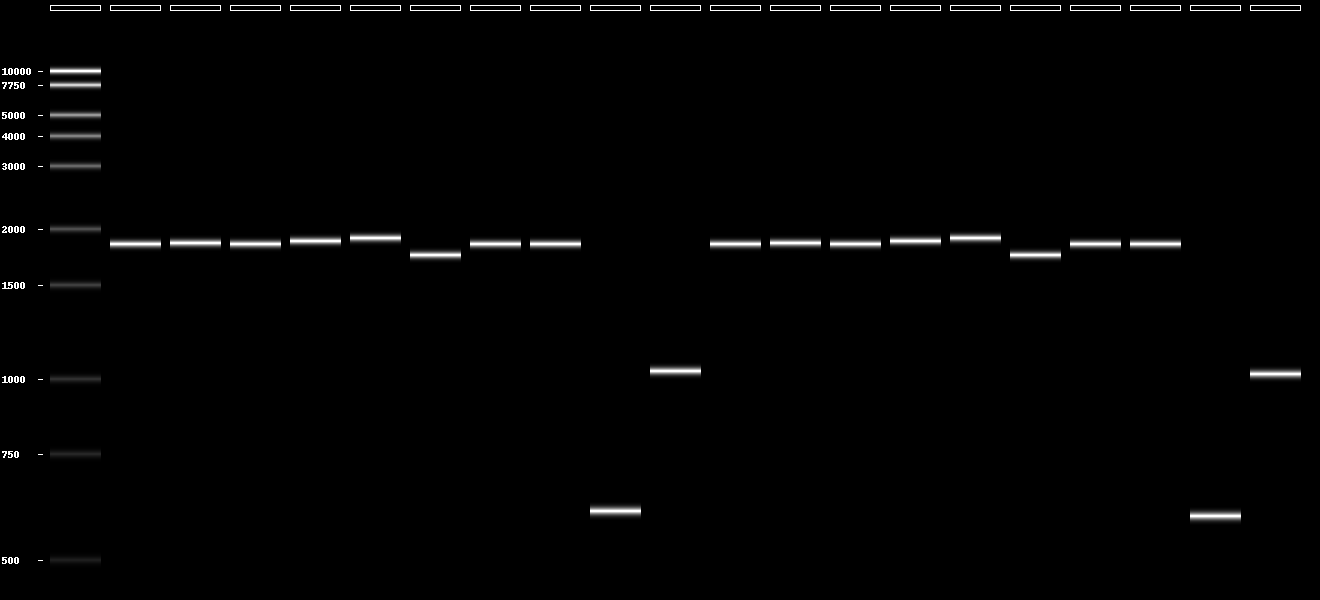

In [72]:
row = row_amplicons("A")+row_amplicons("B")
row_no = 1
for amp in row:
    print("Row "+str(row_no)+": "+amp[0].name)
    row_no += 1
pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

Row 1: PCR_G8H_03
Row 2: PCR_G8H_07
Row 3: PCR_G8H_11
Row 4: PCR_G8H_15
Row 5: PCR_G8H_19
Row 6: PCR_G8H_23
Row 7: PCR_G8H_31
Row 8: PCR_G8H_35
Row 9: PCR_TRP1-DW_01
Row 10: PCR_PRO_03
Row 11: PCR_G8H_04
Row 12: PCR_G8H_08
Row 13: PCR_G8H_12
Row 14: PCR_G8H_16
Row 15: PCR_G8H_20
Row 16: PCR_G8H_24
Row 17: PCR_G8H_32
Row 18: PCR_G8H_36
Row 19: PCR_PRO_04


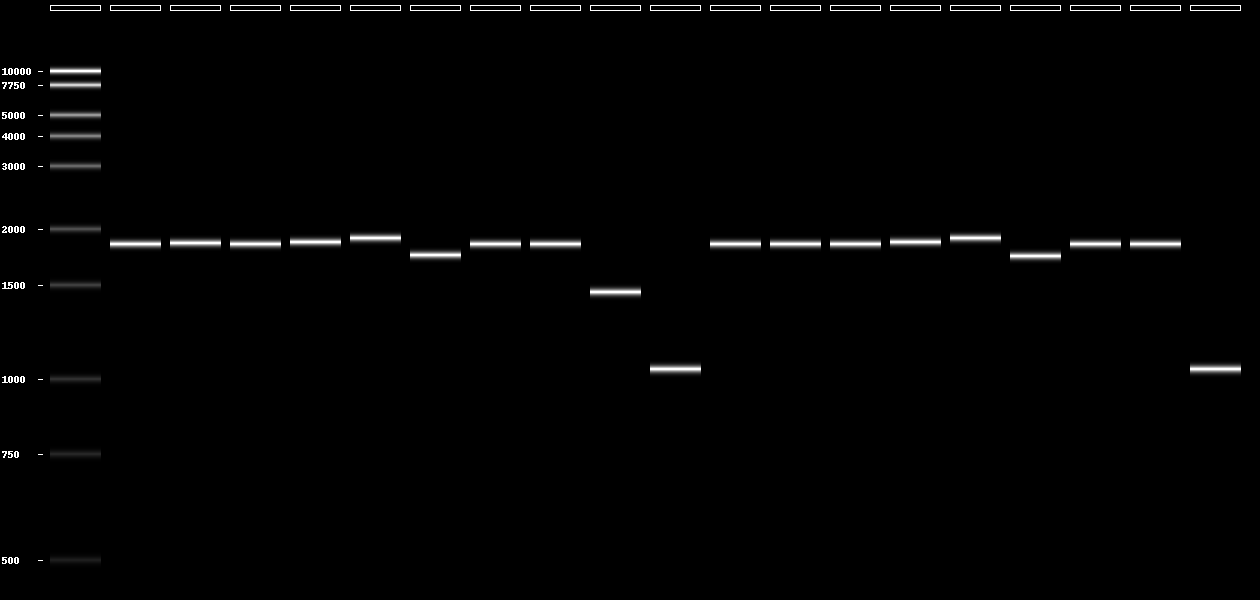

In [73]:
row = row_amplicons("C")+row_amplicons("D")
row_no = 1
for amp in row:
    print("Row "+str(row_no)+": "+amp[0].name)
    row_no += 1
pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

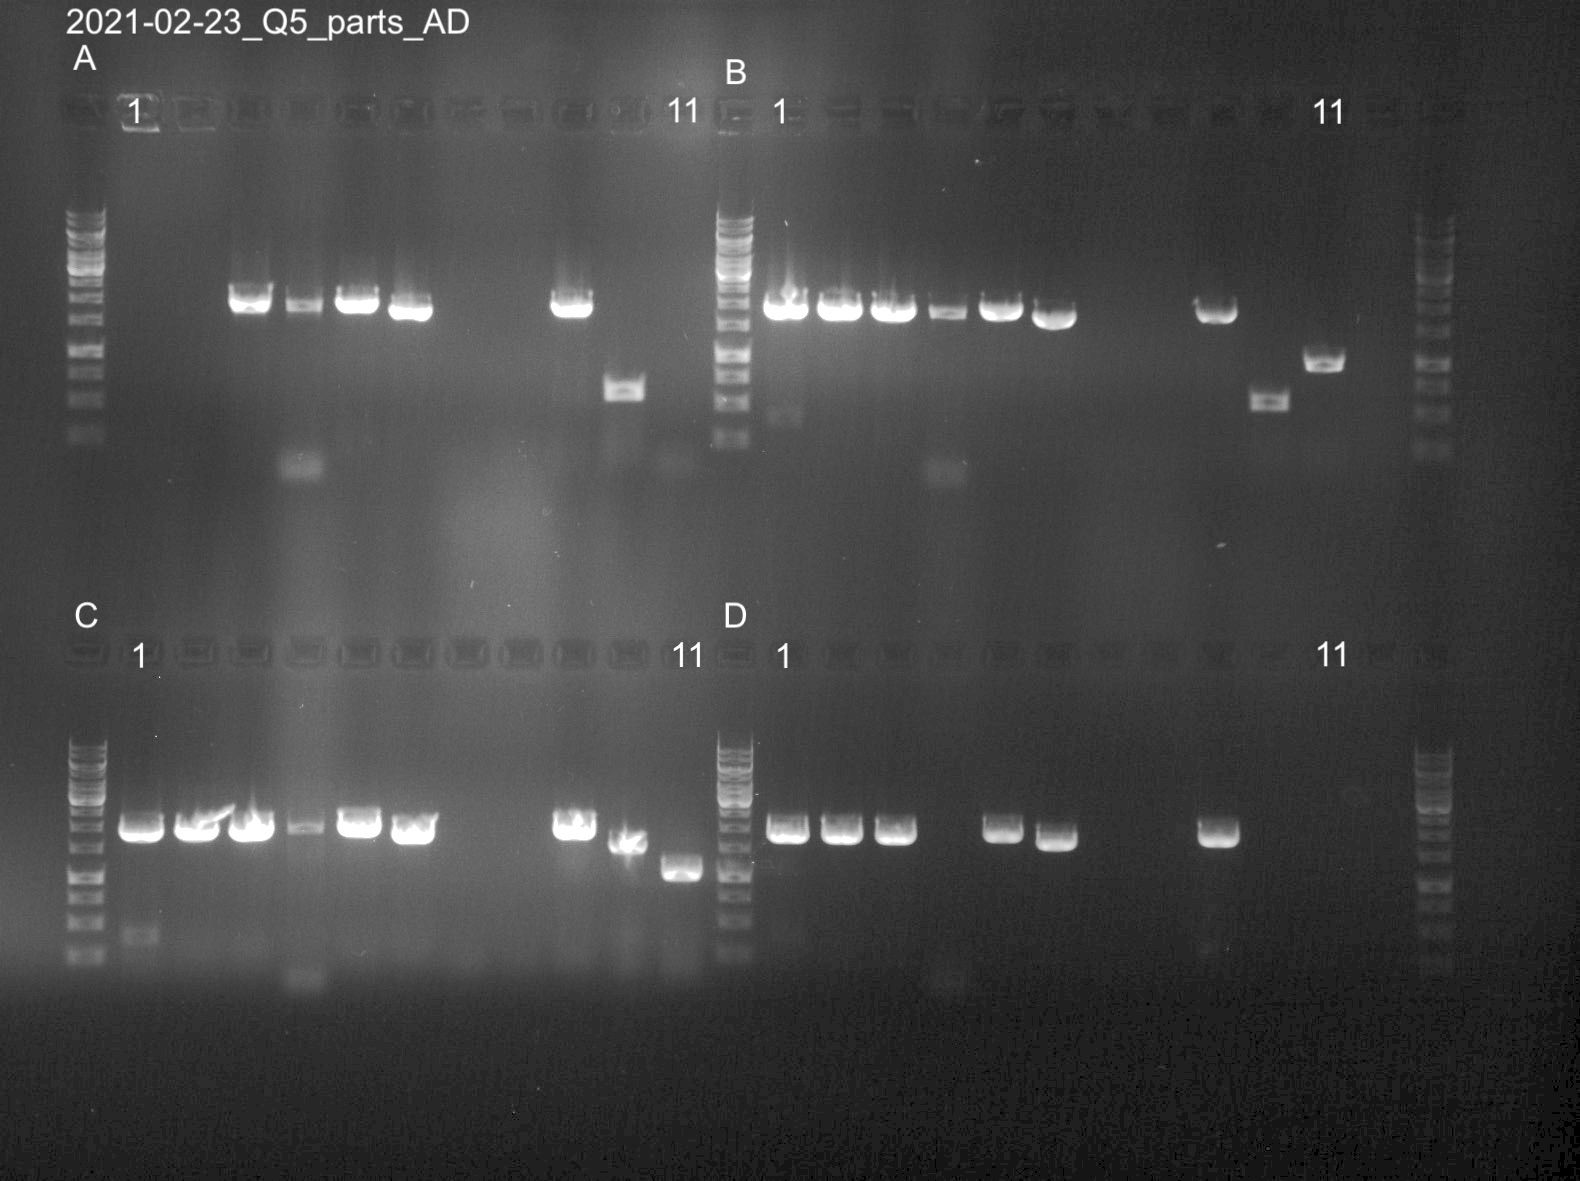

In [74]:
IPython.core.display.Image(utils.bioimager / '2021-02-23_Q5_parts_AD.jpg', width=600)

Row 1: PCR_CPR_21
Row 2: PCR_CPR_30
Row 3: PCR_CPR_23
Row 4: PCR_CPR_29
Row 5: PCR_CPR_22
Row 6: PCR_CPR_26
Row 7: PCR_CPR_27
Row 8: PCR_CPR_28
Row 9: PCR_CPR_24
Row 10: PCR_CPR_25
Row 11: PCR_PRO_07
Row 12: PCR_CPR_31
Row 13: PCR_CPR_40
Row 14: PCR_CPR_33
Row 15: PCR_CPR_39
Row 16: PCR_CPR_32
Row 17: PCR_CPR_36
Row 18: PCR_CPR_37
Row 19: PCR_CPR_38
Row 20: PCR_CPR_34
Row 21: PCR_CPR_35
Row 22: PCR_PRO_08


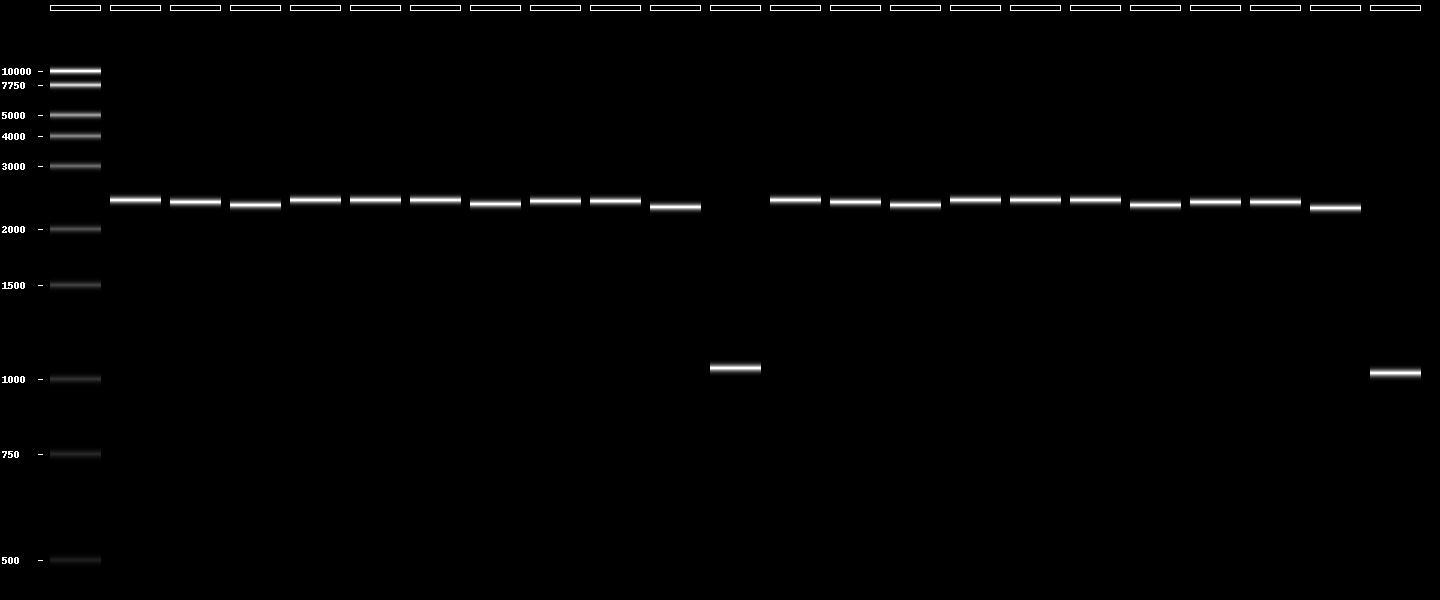

In [75]:
row = row_amplicons("G")+row_amplicons("H")
row_no = 1
for amp in row:
    print("Row "+str(row_no)+": "+amp[0].name)
    row_no += 1
pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

Row 1: PCR_CPR_01
Row 2: PCR_CPR_10
Row 3: PCR_CPR_03
Row 4: PCR_CPR_09
Row 5: PCR_CPR_02
Row 6: PCR_CPR_06
Row 7: PCR_CPR_07
Row 8: PCR_CPR_08
Row 9: PCR_CPR_04
Row 10: PCR_CPR_05
Row 11: PCR_PRO_05
Row 12: PCR_CPR_11
Row 13: PCR_CPR_20
Row 14: PCR_CPR_13
Row 15: PCR_CPR_19
Row 16: PCR_CPR_12
Row 17: PCR_CPR_16
Row 18: PCR_CPR_17
Row 19: PCR_CPR_18
Row 20: PCR_CPR_14
Row 21: PCR_CPR_15
Row 22: PCR_PRO_06


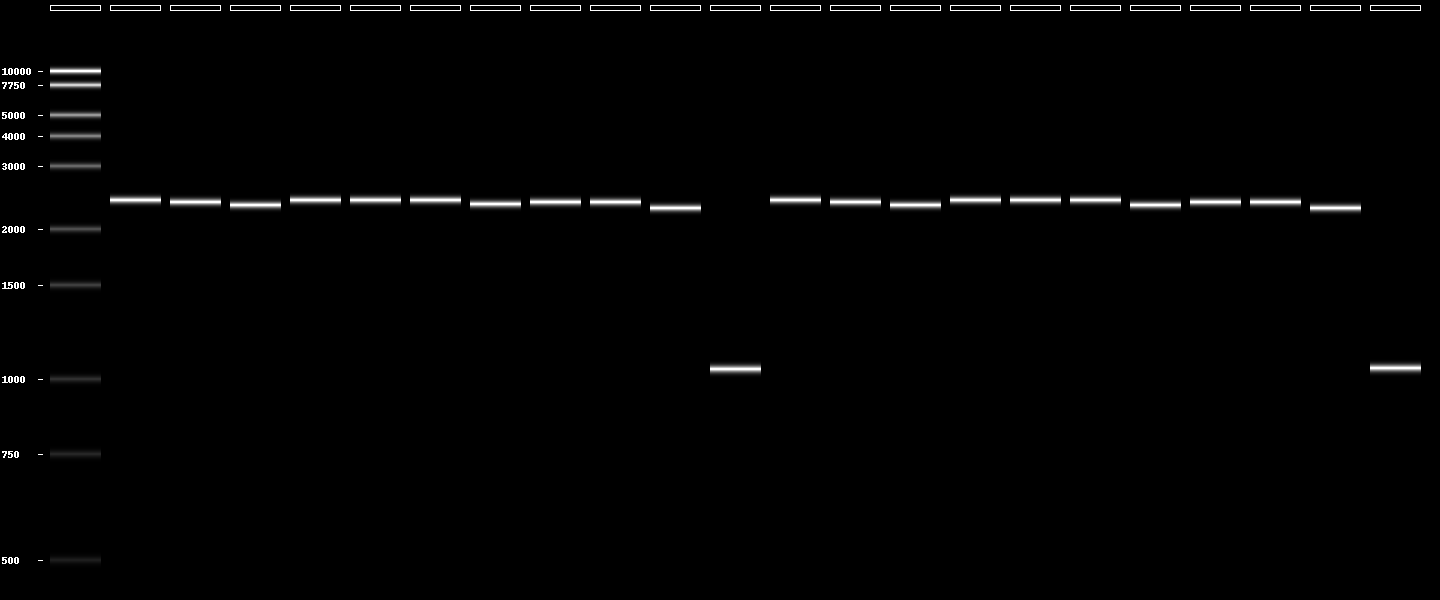

In [76]:
row = row_amplicons("E")+row_amplicons("F")
row_no = 1
for amp in row:
    print("Row "+str(row_no)+": "+amp[0].name)
    row_no += 1
pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

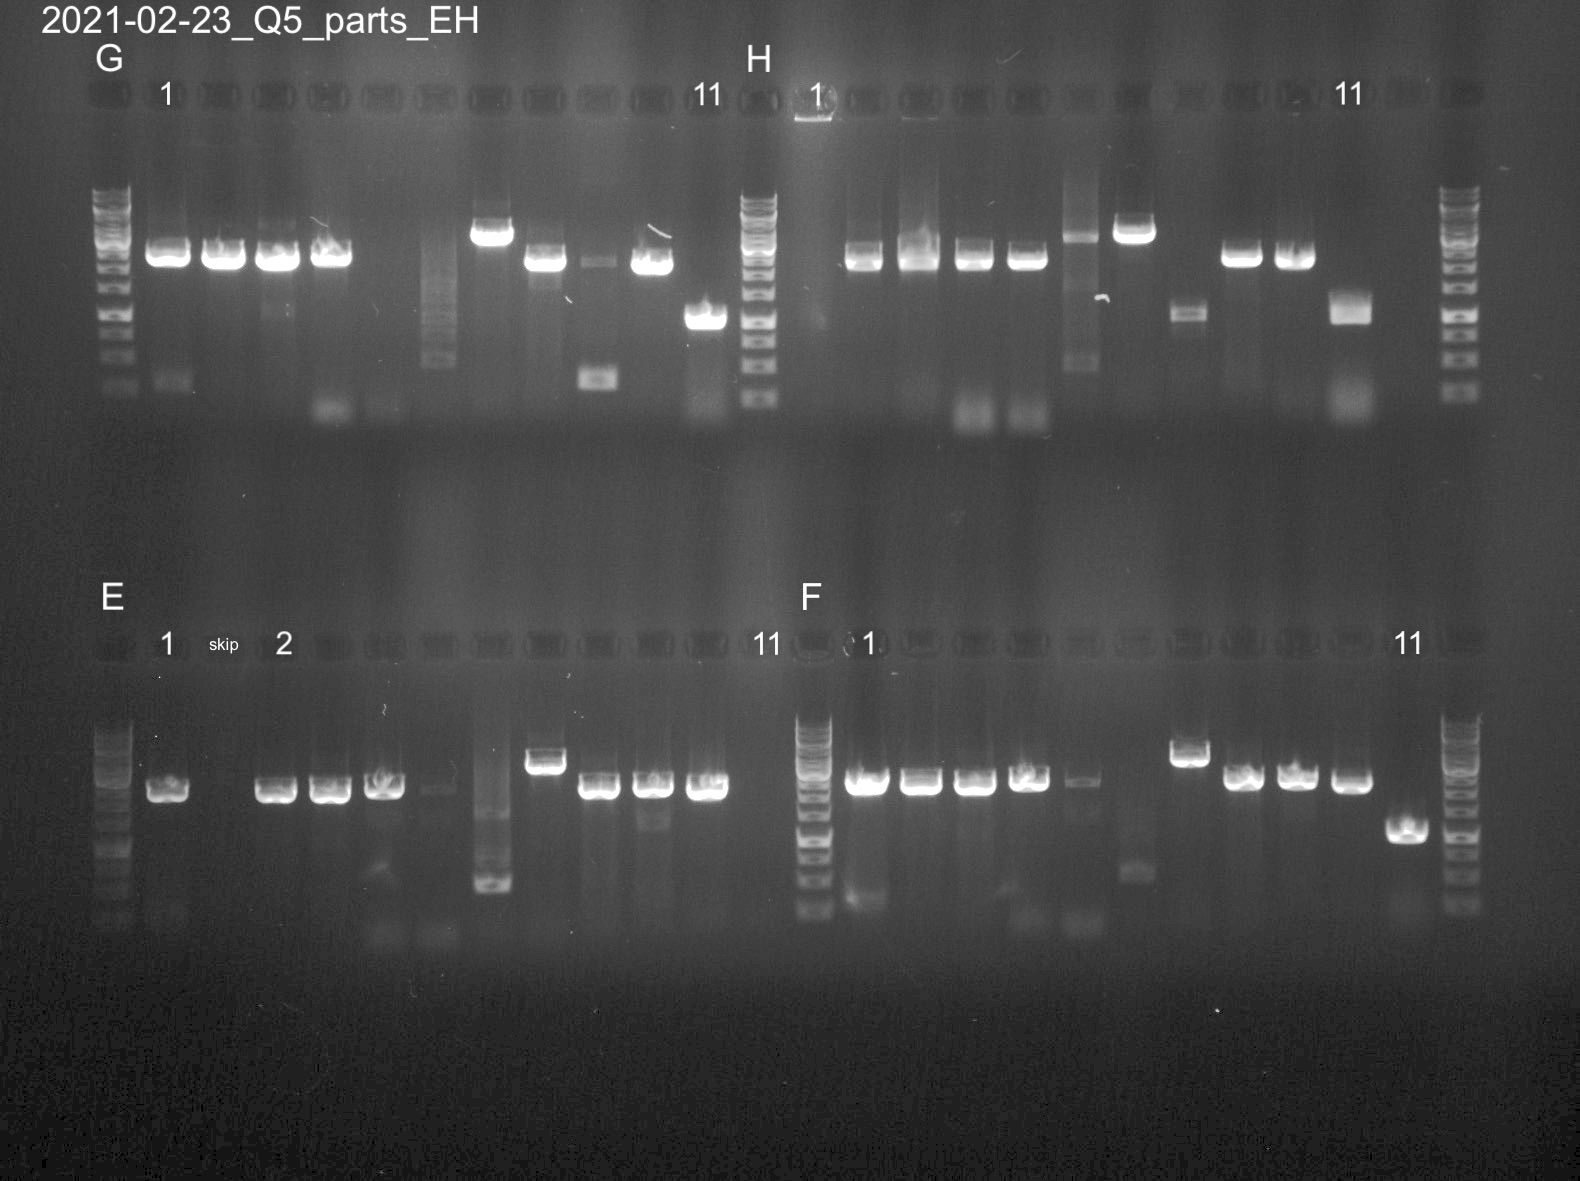

In [77]:
IPython.core.display.Image(utils.bioimager / '2021-02-23_Q5_parts_EH.jpg', width=600)

In [78]:
#row_amplicons = []
#for name in row_names:
#    for amplicon in amplicons:
#        if amplicon.name == name:
#            row_amplicons.append([amplicon])
#row_amplicons 

#pydna.gel.gel([pydna.ladders.PennStateLadder,*row_amplicons]) #GeneRuler_1kb_; [pydna.dseqrecord.Dseqrecord("A"*2000)]

#pydna.gel.gel([pydna.ladders.PennStateLadder,*amplicon_matrix_reshaped_no_duplicates]) #GeneRuler_1kb_; [pydna.dseqrecord.Dseqrecord("A"*2000)]#

##### Results
PCR not working: 

A:
- 1 PCR_G8H_01 #Evaporation of corner well
- 2 PCR_G8H_05 #Evaporation of side well
- 4 PCR_G8H_13 #Weak band and primer dimer
- 7 PCR_G8H_25 #No template 
- 8 PCR_G8H_29 #No template
- 11 PCR_PRO_01 #Evaporated, gDNA template

B:
- 4 PCR_G8H_14 #Weak band and primer dimer
- 7 PCR_G8H_26 #No template
- 8 PCR_G8H_30 #No template

C: 
- 4 PCR_G8H_15 #Weak band and primer dimer
- 7 PCR_G8H_27 #No template
- 8 PCR_G8H_31 #No template

D:  
- PCR_G8H_16 #Weak band and primer dimer
- 7 PCR_G8H_28 #No template
- 8 PCR_G8H_32 #No template
- 11 PCR_PRO_04 #

E:
- 5 PCR_CPR_02 #Weak band and primer dimers. 
- 6 PCR_CPR_06 #Smear
- 11 PCR_PRO_05 #No band, gDNA template

F:
- 5 PCR_CPR_12 #Weak band and primer dimers. 
- 6 PCR_CPR_16 #Smear

G: 
- 5 PCR_CPR_22 #Weak band and primer dimers. 
- 6 PCR_CPR_26 #Smear
- 9 PCR_CPR_24 #Weak band and primer dimers

H:
- 1 PCR_CPR_31 #evaporation of corner well
- 6 PCR_CPR_36 #Weak band, unspecific band ~500bp and smear. 
- 8 PCR_CPR_38 #~1000 bp too short

AniCPR_tCYC1: #A bit longer than the other CPR (H7, E7, F7, G7)
   - PCR_CPR_27, PCR_CPR_07, PCR_CPR_17, PCR_CPR_37
   - Result: Amplicons ~200 bp longer than benchling record (PL_13_E9_(pRS415U-P2_TEF-AniCPR_opt2)).
   - Conclusion: Send plasmid for sequencing.
   
For
1. Row A-D column 4 (CacuG8H)
2. Row E-H column 5 (RseCPR)
3. Row E-H column 6 (AhuCPR)

Weak or no band. primer dimers. 

Works: Polymerase, template, primers, elongation time, Annealing temperature?

1. At = 63! (NEB tm calculator)
2. At = 61
3. At = 61, Forward primer At = 65!

Conclusion: redo PCR with At 60 and volume 50. 
Also add templates p1_H01 (just miniprep'ed) for col 8 row A-D 

##### Conclusion: 
- redo PCR with At 60 and volume 50. 
- Redo PCR with higher volumes and in two PCR plates. A-B and C-H to avoid evaporation. 
- Also add templates p1_H01 (OeuG8H;just miniprep'ed) for col 8 row A-D 

PCR
- Polymerase: Q5 2x MasterMix [protocol](https://international.neb.com/protocols/2012/08/30/protocol-for-q5-hot-start-high-fidelity-2x-master-mix-m0494)
- Program: Create according to protocol
- Elongation time: 1.5 min (30 s/ kb)
- Annealing temp 60
    - All primers are designed to have 3' Tm 59C-54C, and Ta 59C-62C when using  Q5 2x MasterMix (calculated with NEB Tm calculator)

In [79]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = 100,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_100_reac
Template,1.0,100.0
Primer 1,2.5,250.0
Primer 2,2.5,250.0
H20,19.0,1900.0
Pol,25.0,2500.0
Total,50.0,5000.0


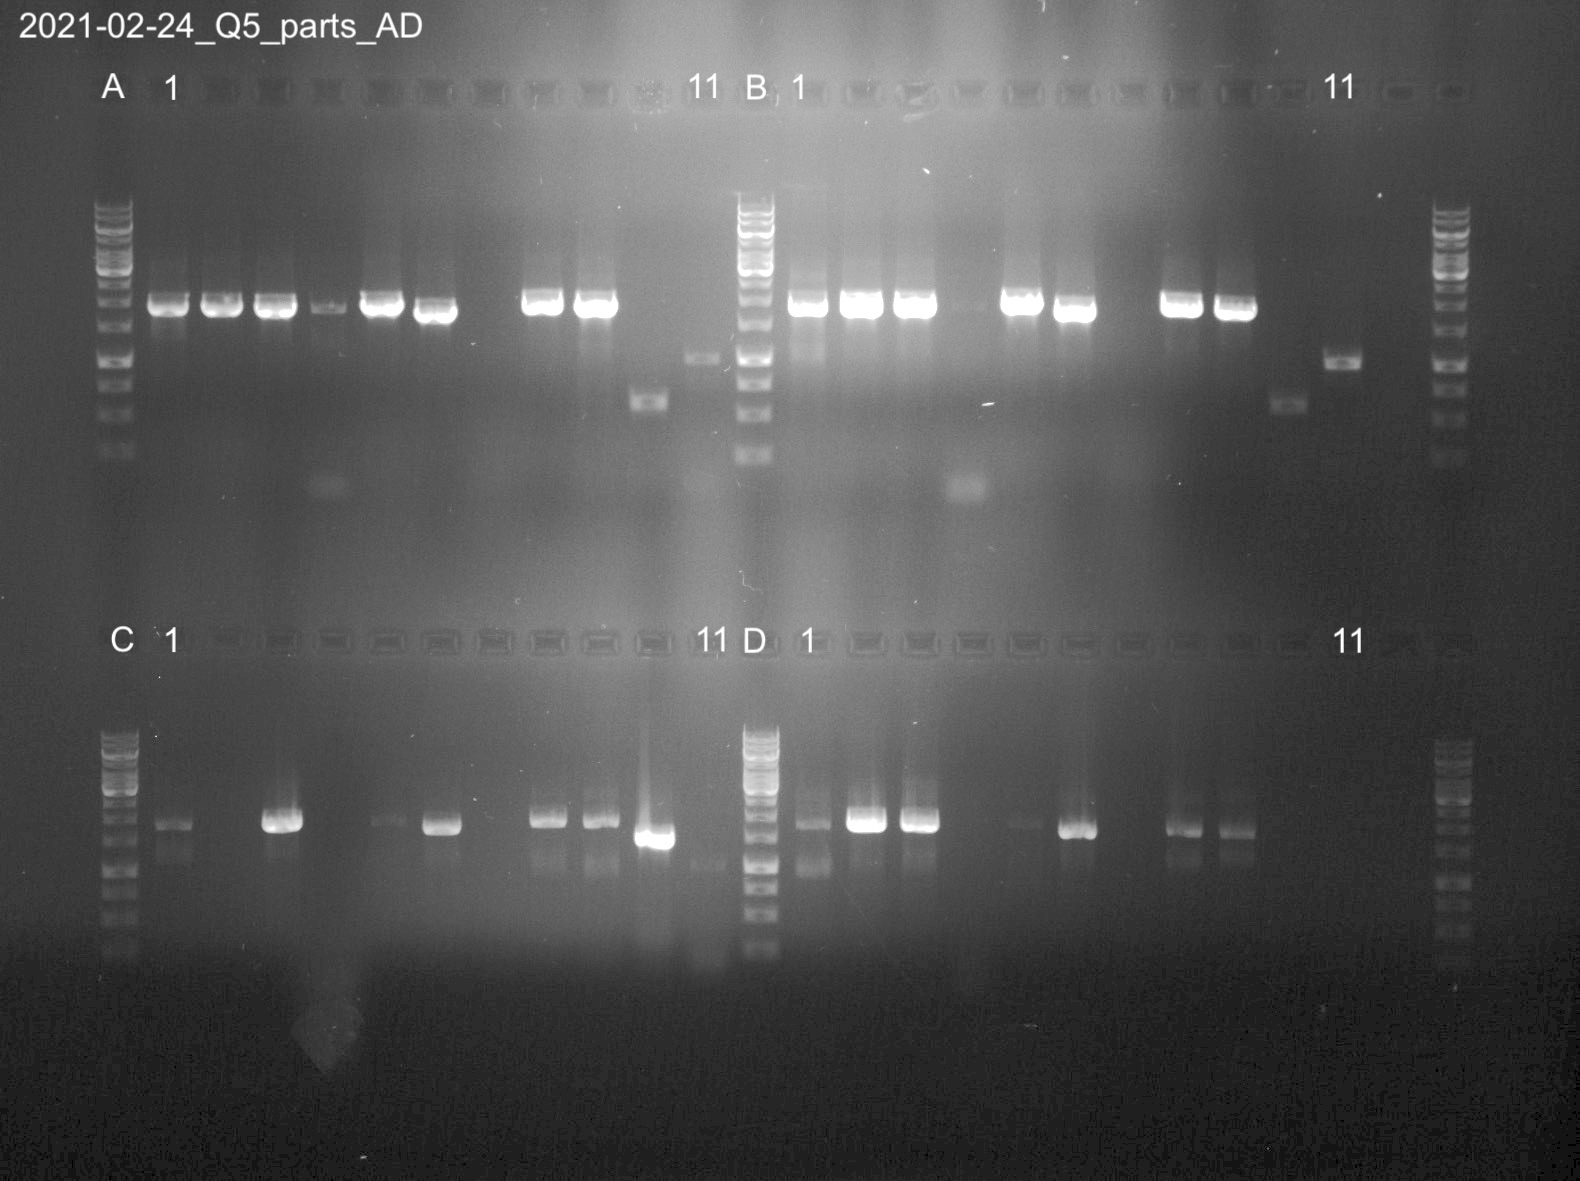

In [80]:
IPython.core.display.Image(utils.bioimager / '2021-02-24_Q5_parts_AD.jpg', width=600)

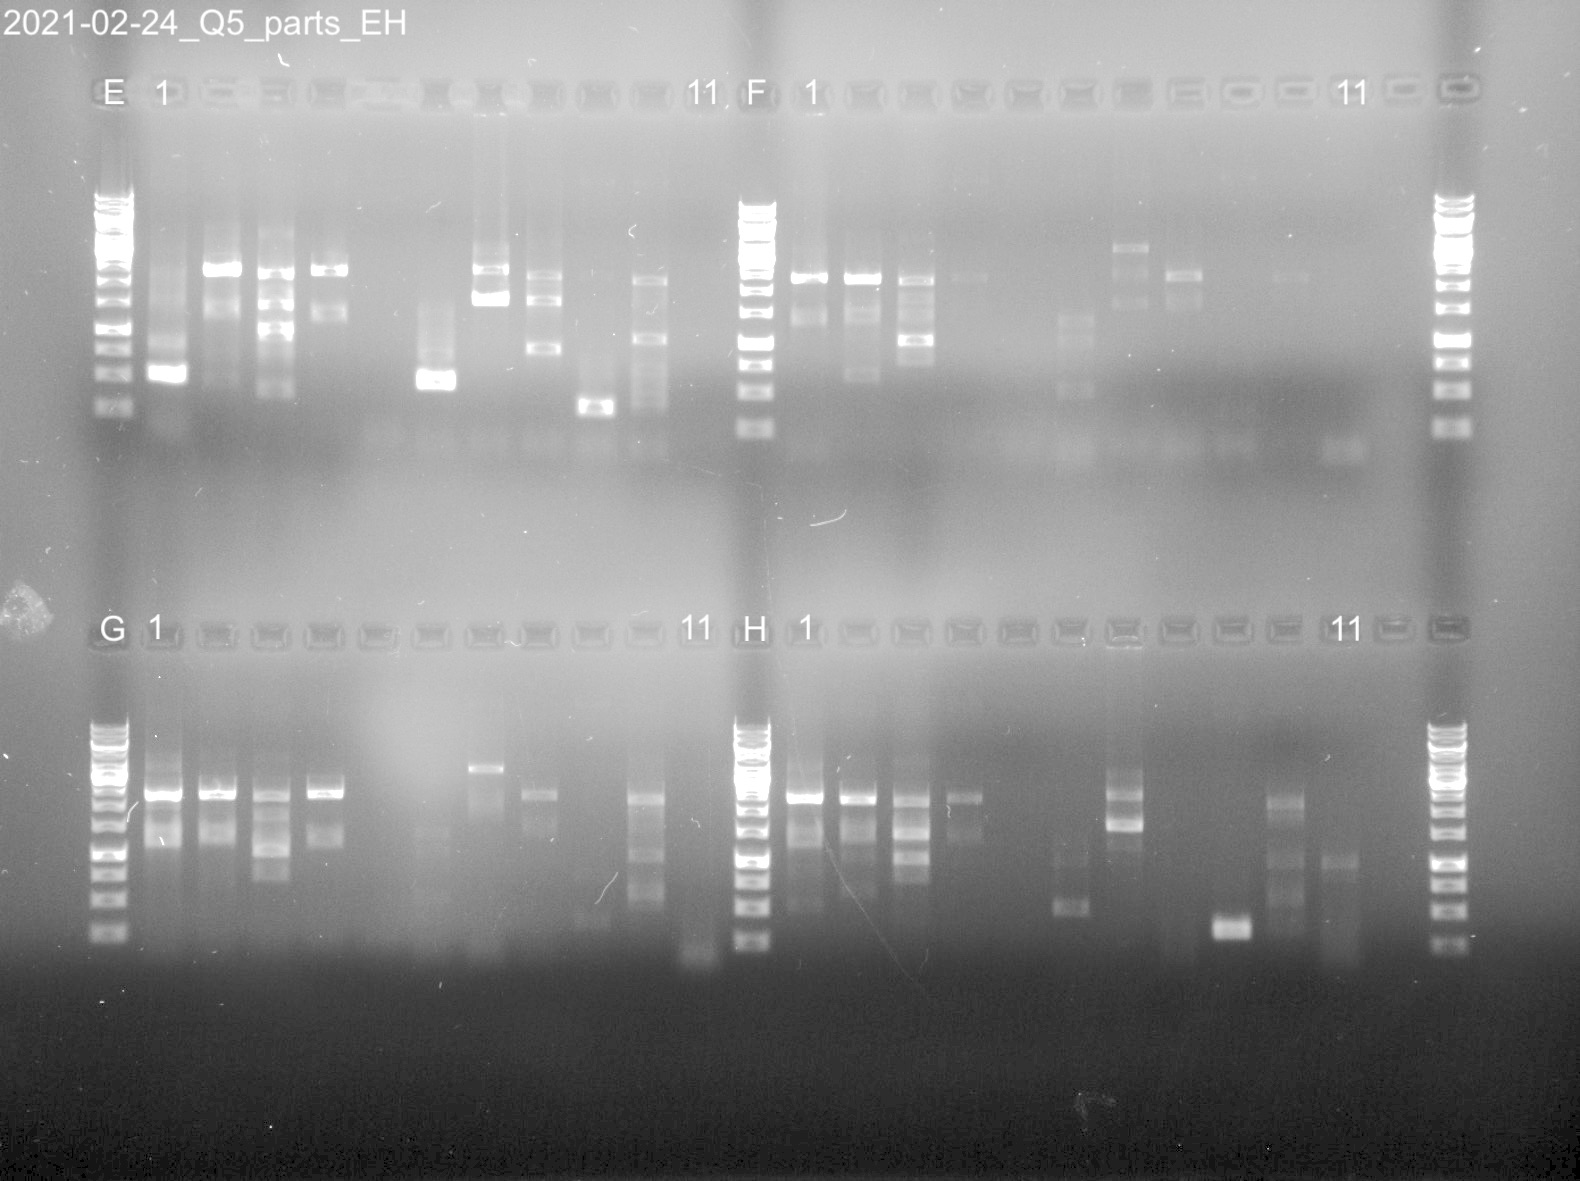

In [81]:
IPython.core.display.Image(utils.bioimager / '2021-02-24_Q5_parts_EH.jpg', width=600)

**Results**:
1. No evaporation from wells.
    - Band now appearing for A: 1,2, and 11 and H1. 
2. new template reactions in col 8 row A-D (OeuG8H) worked
3. Unspecific bands appearing for Rows C-H!

For:
- Row A-D column 4 (CacuG8H)
- Row E-H column 5 (RseCPR)
- Row E-H column 6 (AhuCPR)
weak or no band. primer dimers. 

**Discussion**

1. Evaporation: Avoiding corner and side seems to work! Use as workaround when plate seals are not tight.

2. Increasing At: to 60 didn't help the 12 specific reactions nor primer dimers. Go back to At 58 

3. Unspecific bands, why do they appear? correlate with PCR cycler 006. Problem with cycler temperature control? **Maybe because we pulled out the plate after heating to 98 (hot start polymerase) to add new template reactions?** Did Christine start this cycler 006 first then cycler 003? (Christine started 003 first and then 006 )
   - higher At should decrease amount of unspecific bands not increase it

4. We need:
- ~ 90 more UP, DW, TRP parts than G8H/CPR parts 
- ~ 4 times less promoter parts than UP and DW
Our reactions for all three are working at At 58.

Promoters 6 out of 8 working (col 11 A-H).
D (pTPI1) and E (pURE2) not working 


**Conclusion**
- A1-B11 pool and column purify (day 23&24 samples)
- Redo C1-H11 with At=58,  Vol=50, PCR cycler (not 600), design to avoid corner/side wells

Furthermore

Make (8x 50 µl reaction of each):
- TRP C10
- promoters 11A-C and F-H
- UP A10
- DW B10

For UP and DW use onetaq. Low errorrate not necessary.


C1-B11 redo:
PCR
- Polymerase: Q5 2x MasterMix [protocol](https://international.neb.com/protocols/2012/08/30/protocol-for-q5-hot-start-high-fidelity-2x-master-mix-m0494)
- Program: Create according to protocol
- Elongation time: 1.5 min (30 s/ kb)
- Annealing temp 58

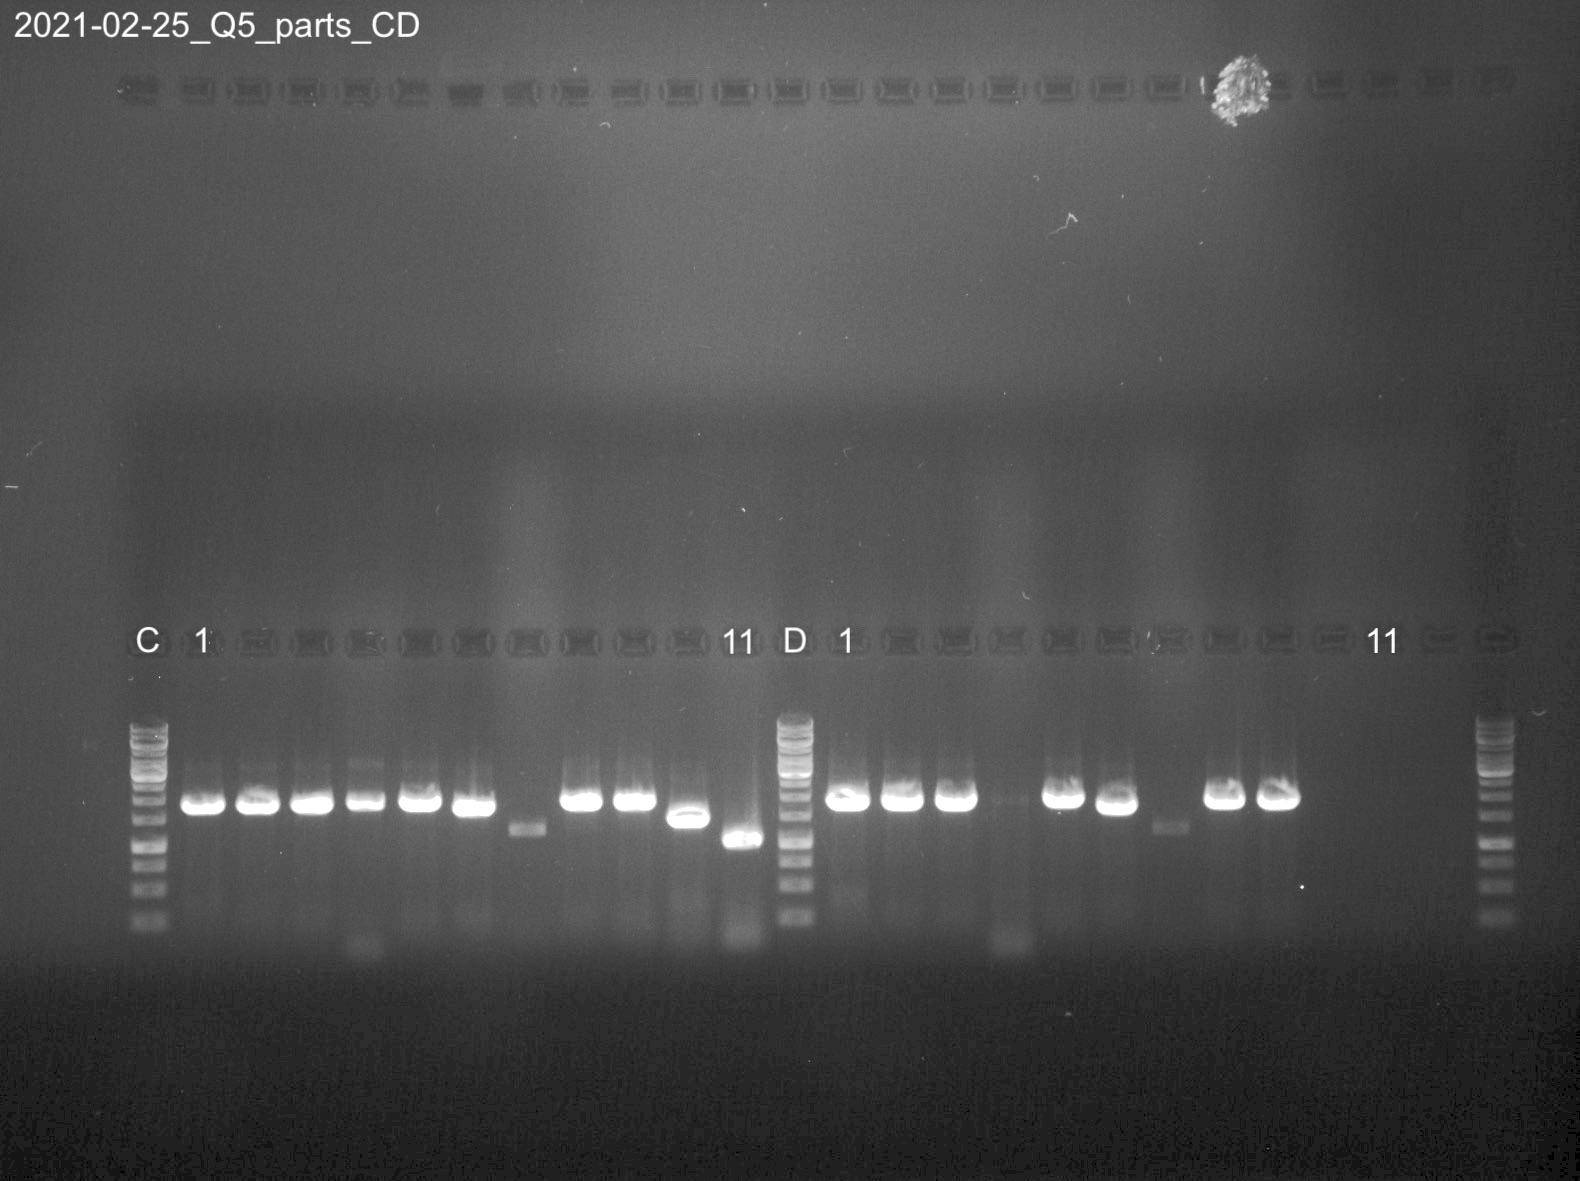

In [82]:
IPython.core.display.Image(utils.bioimager / '2021-02-25_Q5_parts_CD.jpg', width=600)

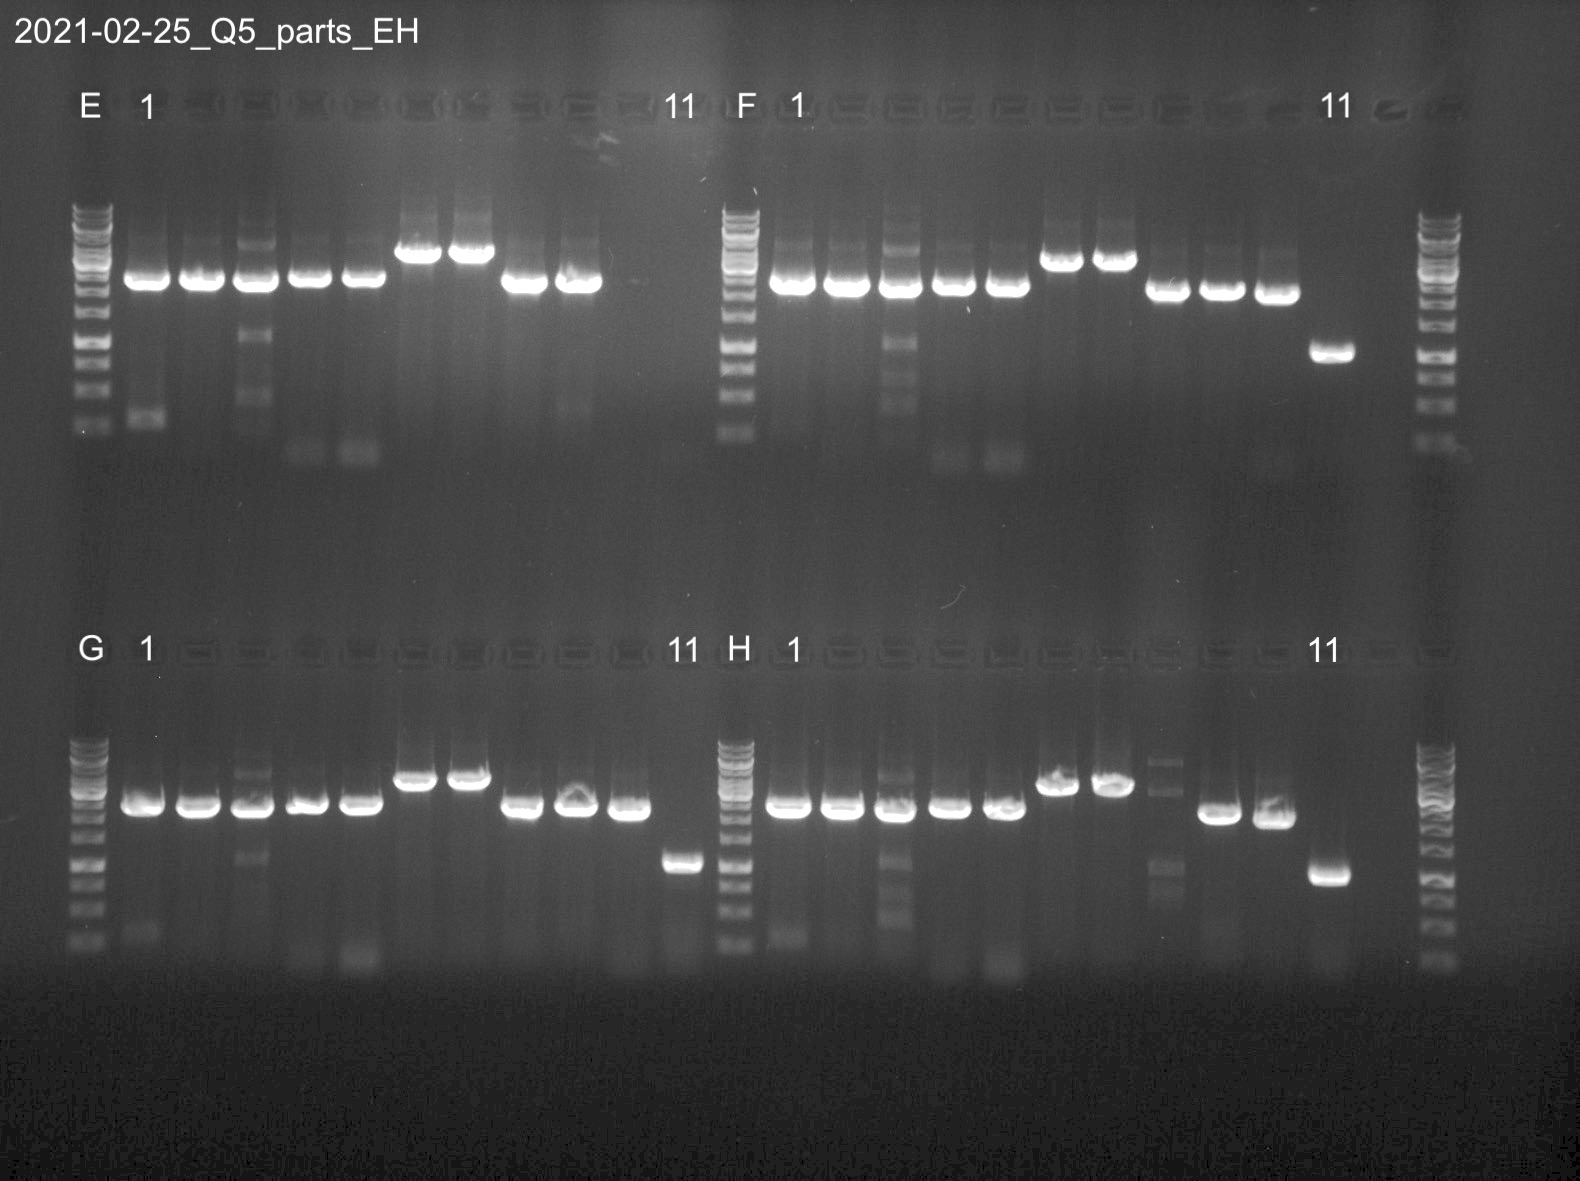

In [83]:
IPython.core.display.Image(utils.bioimager / '2021-02-25_Q5_parts_EH.jpg', width=600)

**Results**

**Discussion**
- many bands has weak larger band that follows the band size. What is that?
- C and D col 11 i.e. promoters pTPI1 (D) and pURE2 (E) are not working. 
- C and D has band in col 7! shouldn't be there. contamination. Good part is that the band is shorter than others. And the other doesn't have that band and all have expected sizes. Maybe use of non-sterile water

**Conclusion**
- Troubleshoot C and D col 11

In [84]:
for col in row_amplicons("D"):
    for co in col:
        print(co.name)

PCR_G8H_04
PCR_G8H_08
PCR_G8H_12
PCR_G8H_16
PCR_G8H_20
PCR_G8H_24
PCR_G8H_32
PCR_G8H_36
PCR_PRO_04


In [85]:
pname = "pTPI1"
pAmp = row_amplicons("D")[8][0]
print(pname, pAmp.name, len(pAmp))
print(pAmp.forward_primer.footprint)
print(pAmp.reverse_primer.footprint)
pTPI1 = pAmp

pTPI1 PCR_PRO_04 1043
AAGGATGAGCCAAGAATAAGG
TTTTAGTTTATGTATGTGTTTTTTGTAG


In [86]:
pname = "pURE2"
pAmp = row_amplicons("E")[10][0]
print(pname, pAmp.name, len(pAmp))
print(pAmp.forward_primer.footprint)
print(pAmp.reverse_primer.footprint)
pURE2 = pAmp

pURE2 PCR_PRO_05 1041
CAAGCTGAACTCGCTGAA
TTGGTGTAGAACTTAATTTGCAG


**Results**

Q5
- pTPI1, tm fw 62 rv 57, At 58
- pURE2, tm fw 62 rv 60, At 61

OneTaq
- pTPI1, tm fw 54 rv 50, At 45
- pURE2, tm fw 55 rv 53, At 48

**Discussion**
Try:
- another template?
    - Do we have a plasmid template? For pTPI1? MIA-CM-3 already have pTPI1 at X-4. Problem?
- other primers? 
    - well D12 empty (double check) in mixed primer plate. Might explain missing pTPI1
    - go back to primers from op4, not mixed plate
    - Order new ?

**Conclusion**
- First: Try Onetaq, Touchdown starting 48, 51, use primers from op4 (not premixed), template MIA-HA-1 col # 3

In [87]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = 1,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_1_reac
Template,1.0,1.0
Primer 1,2.5,2.5
Primer 2,2.5,2.5
H20,19.0,19.0
Pol,25.0,25.0
Total,50.0,50.0


In [88]:
missing_promoter_amplicons = [pTPI1] * 1 + [pURE2] * 1

In [89]:
utils.pcr_locations1(missing_promoter_amplicons)

,location,name,template,fw,rv
0,l4_A01,PCR_PRO_04,l4_A01,op4_D11,op4_D12
1,l4_A01,PCR_PRO_05,l4_A01,op4_E11,op4_E12


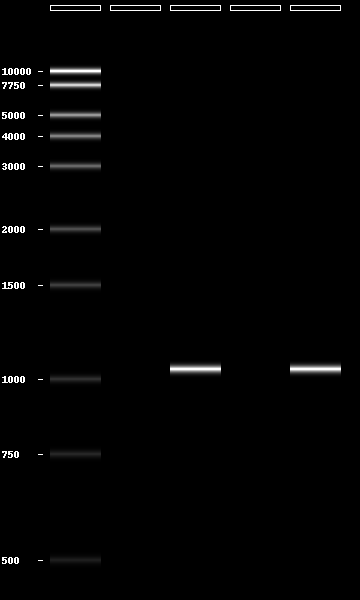

In [90]:
pydna.gel.gel([pydna.ladders.PennStateLadder, [],[missing_promoter_amplicons[0]], [],[missing_promoter_amplicons[1]]])

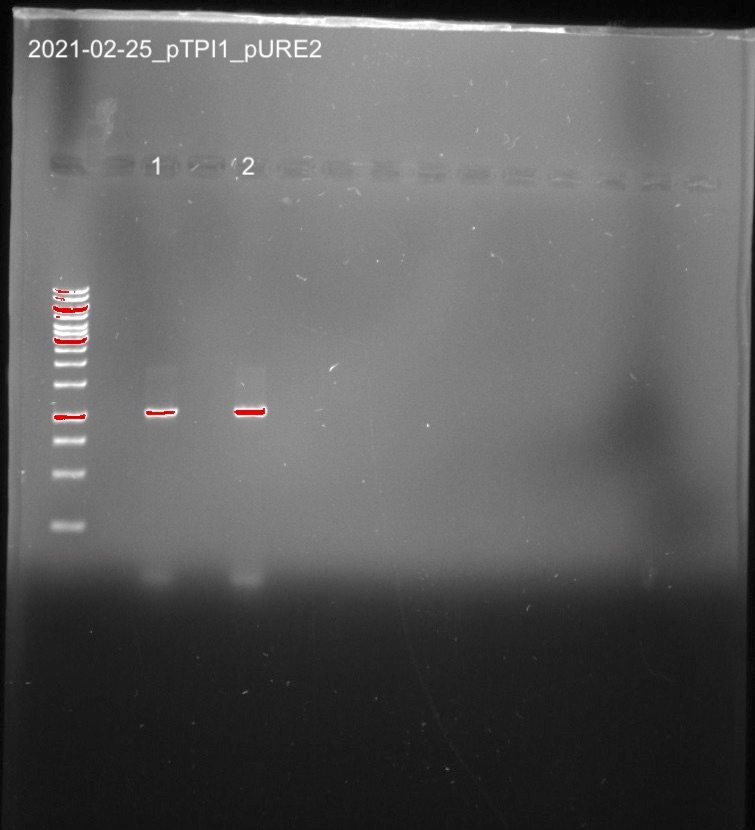

In [91]:
IPython.core.display.Image(utils.bioimager / '2021-02-25_pTPI1_pURE2.jpg', width=300)

**Results**
- works

**Conclusion**
- Try same with Q5
- At pTPI1 58, pURE2 61

In [92]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = 1,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_1_reac
Template,1.0,1.0
Primer 1,2.5,2.5
Primer 2,2.5,2.5
H20,19.0,19.0
Pol,25.0,25.0
Total,50.0,50.0


In [93]:
missing_promoter_amplicons = [pTPI1] * 1 + [pURE2] * 1

In [94]:
utils.pcr_locations1(missing_promoter_amplicons)

,location,name,template,fw,rv
0,l4_A01,PCR_PRO_04,l4_A01,op4_D11,op4_D12
1,l4_A01,PCR_PRO_05,l4_A01,op4_E11,op4_E12


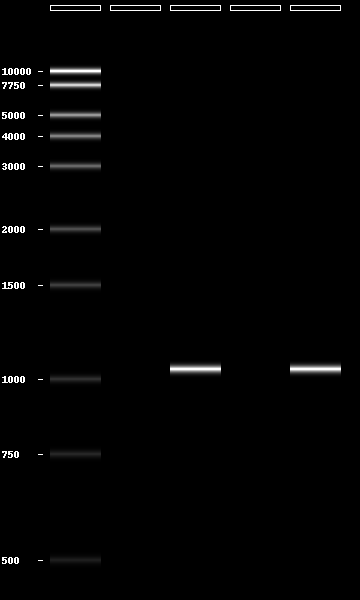

In [95]:
pydna.gel.gel([pydna.ladders.PennStateLadder, [],[missing_promoter_amplicons[0]], [],[missing_promoter_amplicons[1]]])

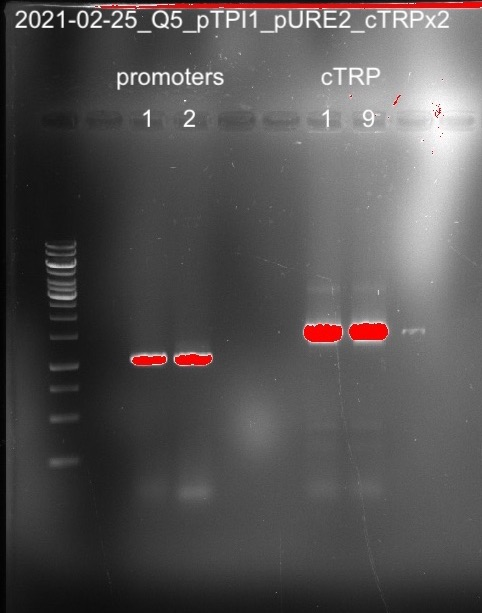

In [96]:
IPython.core.display.Image(utils.bioimager / '2021-02-25_Q5_pTPI1_pURE2_cTRP.jpg', width=300)

**Results**
- works

**Conclusion**
- Amplify 4x 50 µl of all promoter with Q5
- At pTPI1 58, pURE2 61
- Template = MIA-HA-1 col # 3 

In [97]:
def amplicon_inf_col(col,row_no):

    promoter_amp = col_amplicons(col)[row_no][0]
    
    return promoter_amp

In [98]:
promoter_amplicons = [amplicon_inf_col(11,row_no) for row_no in range(0,8)]

In [99]:
promoter_amplicons[0].template.annotations

{'batches': [{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}],
 'molecule_type': 'DNA'}

In [100]:
utils.pcr_locations1(promoter_amplicons)

,location,name,template,fw,rv
0,l4_A01,PCR_PRO_01,l4_A01,op4_A11,op4_A12
1,l4_A01,PCR_PRO_02,l4_A01,op4_B11,op4_B12
2,l4_A01,PCR_PRO_03,l4_A01,op4_C11,op4_C12
3,l4_A01,PCR_PRO_04,l4_A01,op4_D11,op4_D12
4,l4_A01,PCR_PRO_05,l4_A01,op4_E11,op4_E12
5,l4_A01,PCR_PRO_06,l4_A01,op4_F11,op4_F12
6,l4_A01,PCR_PRO_07,l4_A01,op4_G11,op4_G12
7,l4_A01,PCR_PRO_08,l4_A01,op4_H11,op4_H12


Make 4x50µl reactions

In [101]:
promoter_amplicons4 = list(itertools.chain.from_iterable(itertools.repeat(pamp, 4) for pamp in promoter_amplicons))
#promoter_amplicons4

Mastermix

In [102]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = len(promoter_amplicons4) + 3,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_35_reac
Template,1.0,35.0
Primer 1,2.5,87.5
Primer 2,2.5,87.5
H20,19.0,665.0
Pol,25.0,875.0
Total,50.0,1750.0


PCR Program

Determine:
- polymerase
- processing speed
- elongation time
- annealing temperature

In [103]:
#pol = 'Q5 Hot Start'
#for amplicon in promoter_amplicons:
#    amplicon.annotations['polymerase'] = pol
#    amplicon = utils.det_proc_speed(amplicon)
#    amplicon = utils.det_elon_time(amplicon)
#    amplicon = utils.neb_tm_calculator(amplicon, pol)

Print settings:

In [104]:
prom_map = {
    'PCR_PRO_01':'pCYC1',
    'PCR_PRO_02':'pCCW12',
    'PCR_PRO_03':'pMLS1',
    'PCR_PRO_04':'pTPI1',
    'PCR_PRO_05':'pURE2',
    'PCR_PRO_06':'pENO2',
    'PCR_PRO_07':'pPCK1',
    'PCR_PRO_08':'pRPL15B'}

In [105]:
def print_pcr_settings(amplicon):
    pname = prom_map[amplicon.name]
    print(amplicon.name, pname)
    print("Etime: " + str(amplicon.annotations['elongation_time']) + " s")
    print('ta '  + str(amplicon.annotations['ta ' + pol]))
    print()

In [106]:
for pamp in promoter_amplicons:
    print_pcr_settings(pamp)

PCR_PRO_01 pCYC1
Etime: 31 s
ta 60

PCR_PRO_02 pCCW12
Etime: 31 s
ta 61

PCR_PRO_03 pMLS1
Etime: 32 s
ta 58

PCR_PRO_04 pTPI1
Etime: 32 s
ta 58

PCR_PRO_05 pURE2
Etime: 32 s
ta 61

PCR_PRO_06 pENO2
Etime: 32 s
ta 61

PCR_PRO_07 pPCK1
Etime: 32 s
ta 60

PCR_PRO_08 pRPL15B
Etime: 31 s
ta 61



How many different thermal cyclers?

In [107]:
thermal_cyclers = utils.det_no_of_thermal_cyclers(promoter_amplicons, polymerase=pol) # pol
thermal_cyclers

,tas,elong_times,amplicons
0,58,32,"PCR_PRO_03, PCR_PRO_04"
1,60,32,"PCR_PRO_01, PCR_PRO_07"
2,61,32,"PCR_PRO_02, PCR_PRO_05, PCR_PRO_06, PCR_PRO_08"


In [108]:
import textwrap as _textwrap

In [109]:
from pydna._pretty import pretty_str as _pretty_str

In [110]:
def Q5_program(amplicon):
    r"""Returns a string containing a text representation of a suggested
    PCR program using Taq or similar polymerase.
    ::
     |98°C|98°C               |    |tmf:59.5
     |____|_____          72°C|72°C|tmr:59.7
     |30s |10s  \ 59.1°C _____|____|30s/kb
     |    |      \______/ 0:32|5min|GC 51%
     |    |       30s         |    |1051bp
    """

    f = _textwrap.dedent(
        r"""
                            |98°C|98°C               |    |tmf:{tmf:.1f}
                            |____|_____          72°C|72°C|tmr:{tmr:.1f}
                            |30 s|10s  \ {ta:.1f}°C _____|____|{rate}s/kb
                            |    |      \______/{0:2}:{1:2}|2min|GC {GC_prod}%
                            |    |       20s         |    |{size}bp
                            """[
            1:-1
        ].format(
            rate=amplicon.annotations['proc_speed'],
            size=len(amplicon.seq),
            ta=amplicon.annotations['ta Q5 Hot Start'],
            tmf=amplicon.forward_primer.annotations['tm Q5 Hot Start'],
            tmr=amplicon.reverse_primer.annotations['tm Q5 Hot Start'],
            GC_prod=int(amplicon.gc()),
            *map(int, divmod(amplicon.annotations['elongation_time'], 60)),
        )
    )

    return _pretty_str(f)

In [111]:
Q5_program(promoter_amplicons[0])

|98°C|98°C               |    |tmf:59.0
|____|_____          72°C|72°C|tmr:59.0
|30 s|10s  \ 60.0°C _____|____|30s/kb
|    |      \______/ 0:31|2min|GC 36%
|    |       20s         |    |1033bp


Only load one of each

In [112]:
amplicons[0]

Amplicon(609)

In [113]:
type(amplicons[0])

pydna.amplicon.Amplicon

In [114]:
amplicons[0].program()

|95°C|95°C               |    |tmf:57.3
|____|_____          72°C|72°C|tmr:56.6
|5min|30s  \ 55.5°C _____|____|30s/kb
|    |      \______/ 0:18|5min|GC 43%
|    |       30s         |    |609bp


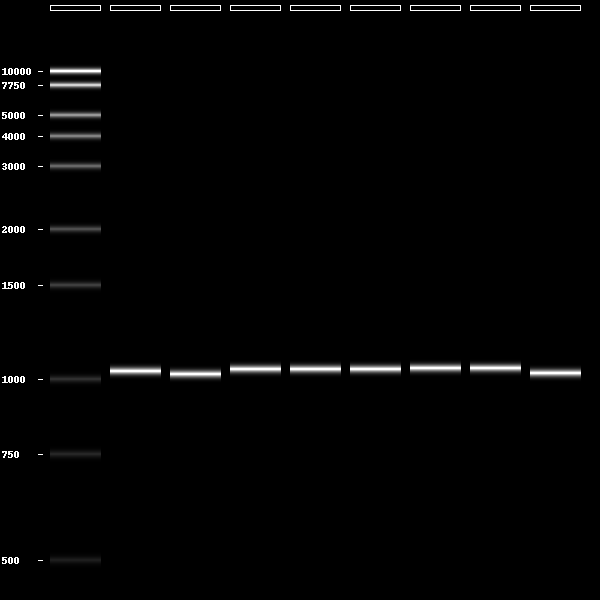

In [115]:
pydna.gel.gel([pydna.ladders.PennStateLadder,*[[pamp] for pamp in promoter_amplicons]])

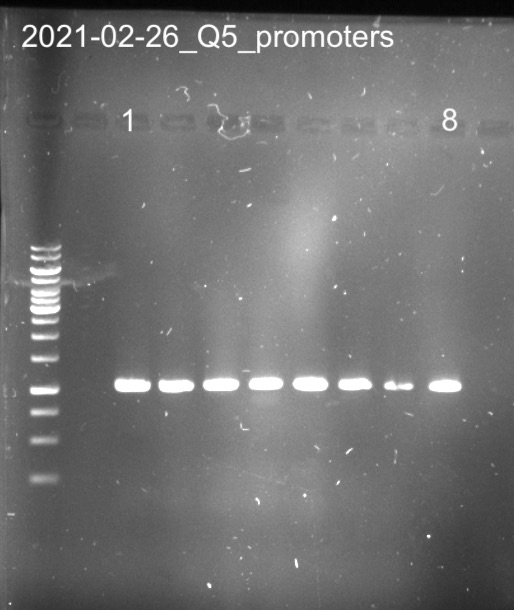

In [116]:
IPython.core.display.Image(utils.bioimager / '2021-02-26_Q5_promoters.jpg', width=300)

In [117]:
pname = "XI-2_UP"
pAmp = row_amplicons("A")[8][0]
print(pname, pAmp.name, len(pAmp))
print("fw footprint: ",pAmp.forward_primer.footprint)
print("rv footprint: ",pAmp.reverse_primer.footprint)
UP = pAmp

XI-2_UP PCR_UP_tADH1_01 609
fw footprint:  GAGGATTTTCGATGGAGC
rv footprint:  TTGTGGAAGTTCATGGC


In [118]:
pname = "XI-2_DW"
pAmp = row_amplicons("B")[9][0]
print(pname, pAmp.name, len(pAmp))
print("fw footprint: ",pAmp.forward_primer.footprint)
print("rv footprint: ",pAmp.reverse_primer.footprint)
DW = pAmp

XI-2_DW PCR_PRO_02 1023
fw footprint:  AAAGAAACTTAATACGTTATGCCG
rv footprint:  TATTGATATAGTGTTTAAGCGAATGAC


Do
- up A10
- dw B10
PCR
- Polymerase: OneTaq 2xMM [protocol](https://international.neb.com/protocols/2012/09/06/protocol-for-onetaq-2x-master-mix-with-standard-buffer-m0482)
- Template MIA-HA-1 col 3 gDNA prep, 0.5 ul 50 µl reaction
- Program: Create according to protocol
- Elongation time: 1 min (60 s/ kb)
- Annealing temp 47 (UP) / 49 (DW) [tm calculator](https://tmcalculator.neb.com/#!/main)

In [119]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = 35,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_35_reac
Template,1.0,35.0
Primer 1,2.5,87.5
Primer 2,2.5,87.5
H20,19.0,665.0
Pol,25.0,875.0
Total,50.0,1750.0


In [120]:
UP_DW_amplicons = [UP] * 16 + [DW] *16 

In [121]:
utils.pcr_locations1(UP_DW_amplicons)

,location,name,template,fw,rv
0,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
1,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
2,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
3,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
4,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
5,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
6,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
7,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
8,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07
9,l4_A01,PCR_UP_tADH1_01,l4_A01,o2_I06,o2_I07


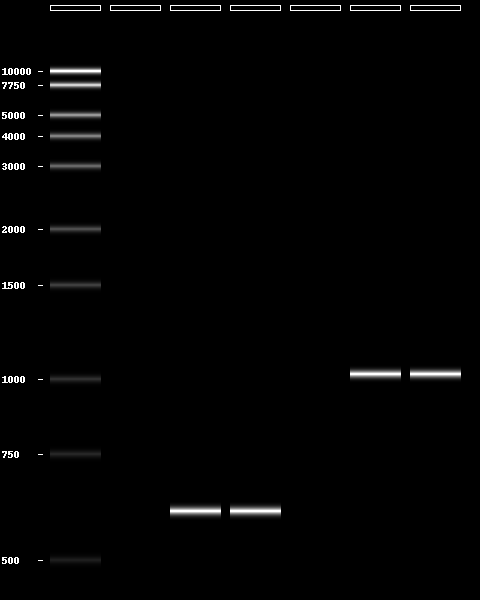

In [122]:
pydna.gel.gel([pydna.ladders.PennStateLadder, [],[UP_DW_amplicons[0]], [UP_DW_amplicons[1]], [],[UP_DW_amplicons[16]], [UP_DW_amplicons[17]]])

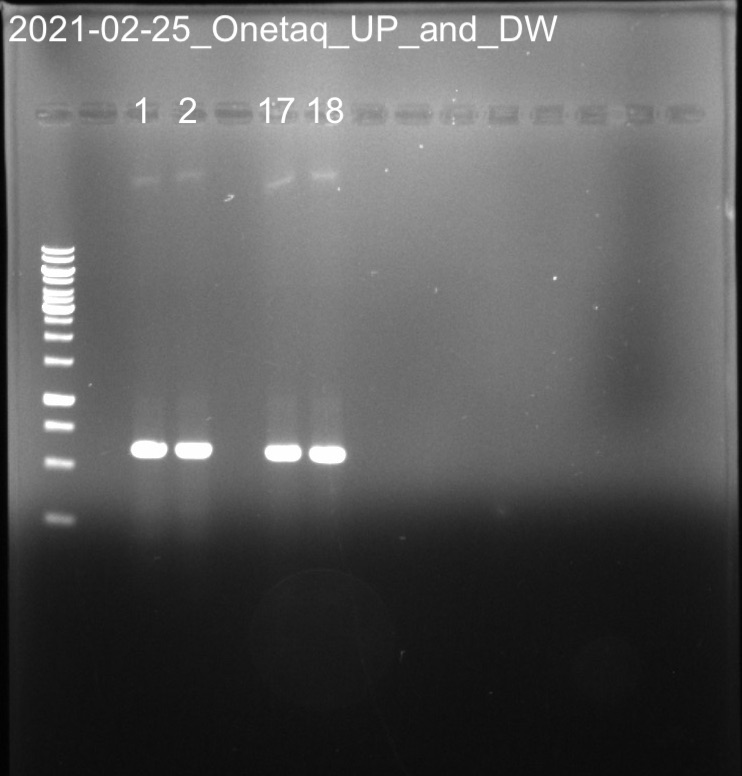

In [123]:
IPython.core.display.Image(utils.bioimager / '2021-02-25_Onetaq_UP_and_DW.jpg', width=300)

In [124]:
pname = "cTRP"
pAmp = row_amplicons("C")[8][0]
print(pname, pAmp.name, len(pAmp))
print("fw footprint: ",pAmp.forward_primer.footprint)
print("rv footprint: ",pAmp.reverse_primer.footprint)
cTRP = pAmp

cTRP PCR_TRP1-DW_01 1451
fw footprint:  AGACGGTCACAGCTTGTCTGTAAGC
rv footprint:  CGTAGTGGGCCATCGCCC


Do
- cTRP C10

PCR
- Polymerase: Q5 2x MasterMix [protocol](https://international.neb.com/protocols/2012/08/30/protocol-for-q5-hot-start-high-fidelity-2x-master-mix-m0494)
- Program: Create according to protocol
- Elongation time: 1 min (30 s/ kb)
- Annealing temp 58

In [125]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = 17,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_17_reac
Template,1.0,17.0
Primer 1,2.5,42.5
Primer 2,2.5,42.5
H20,19.0,323.0
Pol,25.0,425.0
Total,50.0,850.0


In [126]:
cTRP_amplicon = [cTRP] 

In [127]:
utils.pcr_locations1(cTRP_amplicon)

,location,name,template,fw,rv
0,pL_01_E8,PCR_TRP1-DW_01,pL_01_E8,op4_C10,op4_D10


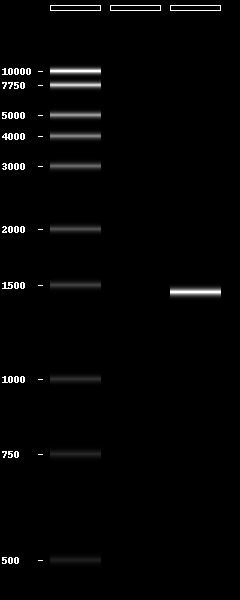

In [128]:
pydna.gel.gel([pydna.ladders.PennStateLadder, [],cTRP_amplicon])

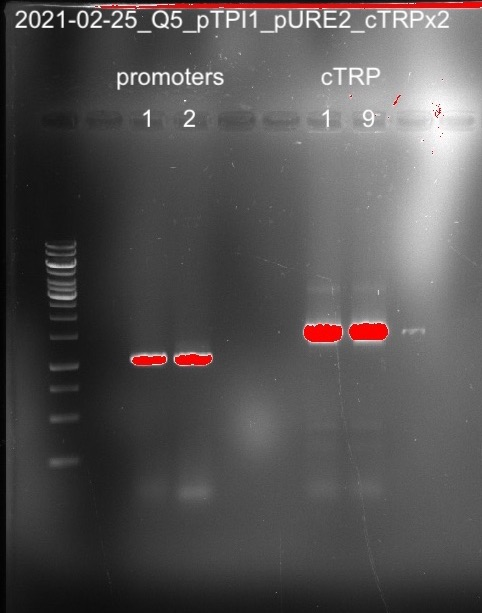

In [129]:
IPython.core.display.Image(utils.bioimager / '2021-02-25_Q5_pTPI1_pURE2_cTRP.jpg', width=300)

gel purify if unspecific band that is not primer dimer. Primer dimers should be removed by column purification

In [130]:
#Exporting notebook (hiding code cells)
#!jupyter nbconvert ./2021-02-01_library.ipynb --to=html --TemplateExporter.exclude_input=True

#### Add pcrs concentration and volume to storage digitally (Benchling batch information)

#### Add pcrs to storage physical

#### Retrieve pcrs concentration and volume from Benchling

In [131]:
#for comb_no in range(0, no_combs):
#    for frag_no in range(0, no_frags):
#        amplicon_matrix[comb_no][frag_no].annotations['volume'] = 50 
#        amplicon_matrix[comb_no][frag_no].annotations['concentration'] = 100

## Assemblies

Before constructing the entire library we start by constructing a few selected strains to check if our strategy works:
- all 16 promoter combinations for croG8H and croCPR

| Name | Parent | gRNA (500 ng) | Parts (300 ng) |
| --- | --- | --- | --- |
| MIA-HA-(2-17) | MIA-HA-1 | pESC-URA-gRNA_XI2-2 | 7 fragments | 

Amplicons needed

In [132]:
cro_UP_names      = ['PCR_UP_tADH1_01']
cro_G8H_names     = ['PCR_G8H_21','PCR_G8H_22','PCR_G8H_23','PCR_G8H_24']
cro_pG8H_names    = ['PCR_PRO_01','PCR_PRO_06','PCR_PRO_07','PCR_PRO_08']
cro_pCPR_names    = ['PCR_PRO_05','PCR_PRO_04','PCR_PRO_03','PCR_PRO_02']
cro_CPR_names     = ['PCR_CPR_01','PCR_CPR_11','PCR_CPR_21','PCR_CPR_31']
cro_marker_names  = ['PCR_TRP1-DW_01']
cro_DW_names      = ['PCR_TRP1-DW_02']

In [133]:
def amplicon_by_name(name, amplicons_lst):
    for amplicon in amplicons_lst:
        if amplicon.name == name:
            return amplicon

Correct order:

PCR_PRO_01 pCYC1     PCR_G8H_21
PCR_PRO_06 pENO2     PCR_G8H_22
PCR_PRO_07 pPCK1     PCR_G8H_23
PCR_PRO_08 pRPL15B   PCR_G8H_24

PCR_PRO_05 pURE2     PCR_CPR_01
PCR_PRO_04 pTPI1     PCR_CPR_11
PCR_PRO_03 pMLS1     PCR_CPR_21
PCR_PRO_02 pCCW12    PCR_CPR_31

In [134]:
G8H_map = {
    'PCR_PRO_01' :  'PCR_G8H_21',    #pCYC1   
    'PCR_PRO_06' :  'PCR_G8H_22',    #pENO2   
    'PCR_PRO_07' :  'PCR_G8H_23',    #pPCK1   
    'PCR_PRO_08' :  'PCR_G8H_24'     #pRPL15B     
}

In [135]:
CPR_map = {
    'PCR_PRO_05' :  'PCR_CPR_01',    #pURE2  
    'PCR_PRO_04' :  'PCR_CPR_11',    #pTPI1  
    'PCR_PRO_03' :  'PCR_CPR_21',    #pMLS1  
    'PCR_PRO_02' :  'PCR_CPR_31'     #pCCW12     
}

In [136]:
cro_UP_sites      = [amplicon_by_name(name, amplicons) for name in cro_UP_names    ]
cro_G8H_sites     = [amplicon_by_name(name, amplicons) for name in cro_G8H_names   ]
cro_pG8H_sites    = [amplicon_by_name(name, amplicons) for name in cro_pG8H_names  ]
cro_pCPR_sites    = [amplicon_by_name(name, amplicons) for name in cro_pCPR_names  ]
cro_CPR_sites     = [amplicon_by_name(name, amplicons) for name in cro_CPR_names   ]
cro_marker_sites  = [amplicon_by_name(name, amplicons) for name in cro_marker_names]
cro_DW_sites      = [amplicon_by_name(name, amplicons) for name in cro_DW_names    ]

In [137]:
cro_G8H_pG8H_names = list(zip(cro_G8H_names,cro_pG8H_names))
cro_G8H_pG8H_sites = list(zip(cro_G8H_sites,cro_pG8H_sites))
cro_CPR_pCPR_names = list(zip(cro_CPR_names,cro_pCPR_names))
cro_CPR_pCPR_sites = list(zip(cro_CPR_sites,cro_pCPR_sites))

In [138]:
#Create a list of fragments within a list of parts.
cro_fragment_list = [cro_UP_sites,cro_G8H_pG8H_sites,cro_CPR_pCPR_sites,cro_marker_sites,cro_DW_sites]

#The number of fragments to be assembled
cro_no_frags = len(cro_fragment_list)
print("Number of fragments:", cro_no_frags)

#The number of parts of each fragment
cro_no_parts = [len(l) for l in cro_fragment_list]
print("Number of parts: ",cro_no_parts)

#The number of possible combinations
cro_no_combs = utils.multiplyList(cro_no_parts)
print("Number of possible combinations:",cro_no_combs)

#How many repitions are needed?
cro_repetition_list = [int(cro_no_comb/cro_no_part) for cro_no_comb, cro_no_part in zip([cro_no_combs]*len(cro_no_parts),cro_no_parts)]
print("The number of time each fragment must be repeated:", cro_repetition_list)

#Matrix with all combinations
print("\nCombinations:")
cro_combinations_matrix = [t for t in itertools.product(*cro_fragment_list)]
flat_cro_combinations_matrix = []
for row in cro_combinations_matrix:
    temp = []
    for i, ele in enumerate(row):
        if not isinstance(ele, tuple):
            temp.append(ele)
        else:
            if i == 1:
                temp.append(ele[0])
                temp.append(ele[1])
            elif i == 2:
                temp.append(ele[1])
                temp.append(ele[0])
    flat_cro_combinations_matrix.append(temp)

for row in flat_cro_combinations_matrix:
    names = []
    for element in row:
        names.append(element.name)
    print(names)

Number of fragments: 5
Number of parts:  [1, 4, 4, 1, 1]
Number of possible combinations: 16
The number of time each fragment must be repeated: [16, 4, 4, 16, 16]

Combinations:
['PCR_UP_tADH1_01', 'PCR_G8H_21', 'PCR_PRO_01', 'PCR_PRO_05', 'PCR_CPR_01', 'PCR_TRP1-DW_01', 'PCR_TRP1-DW_02']
['PCR_UP_tADH1_01', 'PCR_G8H_21', 'PCR_PRO_01', 'PCR_PRO_04', 'PCR_CPR_11', 'PCR_TRP1-DW_01', 'PCR_TRP1-DW_02']
['PCR_UP_tADH1_01', 'PCR_G8H_21', 'PCR_PRO_01', 'PCR_PRO_03', 'PCR_CPR_21', 'PCR_TRP1-DW_01', 'PCR_TRP1-DW_02']
['PCR_UP_tADH1_01', 'PCR_G8H_21', 'PCR_PRO_01', 'PCR_PRO_02', 'PCR_CPR_31', 'PCR_TRP1-DW_01', 'PCR_TRP1-DW_02']
['PCR_UP_tADH1_01', 'PCR_G8H_22', 'PCR_PRO_06', 'PCR_PRO_05', 'PCR_CPR_01', 'PCR_TRP1-DW_01', 'PCR_TRP1-DW_02']
['PCR_UP_tADH1_01', 'PCR_G8H_22', 'PCR_PRO_06', 'PCR_PRO_04', 'PCR_CPR_11', 'PCR_TRP1-DW_01', 'PCR_TRP1-DW_02']
['PCR_UP_tADH1_01', 'PCR_G8H_22', 'PCR_PRO_06', 'PCR_PRO_03', 'PCR_CPR_21', 'PCR_TRP1-DW_01', 'PCR_TRP1-DW_02']
['PCR_UP_tADH1_01', 'PCR_G8H_22', 'PCR

In [139]:
assembly_names       = ["MIA-HA-" + str(i+2) for i in range(0,len(flat_cro_combinations_matrix))]
assembly_names_short = ["HA" + str(i+2) for i in range(0,len(flat_cro_combinations_matrix))]
assembly_names

['MIA-HA-2',
 'MIA-HA-3',
 'MIA-HA-4',
 'MIA-HA-5',
 'MIA-HA-6',
 'MIA-HA-7',
 'MIA-HA-8',
 'MIA-HA-9',
 'MIA-HA-10',
 'MIA-HA-11',
 'MIA-HA-12',
 'MIA-HA-13',
 'MIA-HA-14',
 'MIA-HA-15',
 'MIA-HA-16',
 'MIA-HA-17']

In [140]:
parameters = {
'bg_strain': HA1,
'site_names': ["XI_2"],
'gRNAs': [XI2_2_gRNA],
#'parts': [flat_cro_combinations_matrix[0]],
'assembly_limits':[30],
#'assembly_names': ["pCYC1_pURE2"],
'verbose': False,
'to_benchling': False  
}

In [141]:
assemble_strains = True

In [142]:
if assemble_strains:
    assemblies = []
    for i, name in enumerate(assembly_names):
        assembly = utils.casembler(**{'parts'          : [flat_cro_combinations_matrix[i]],
                                      'assembly_names' : [name], 
                                       **parameters})
        assemblies.append(assembly)
    assemblies
    
    HA2 = assemblies[0]
    
    #clc20.open(HA2)

In [145]:
assemblies[0].write("test.gbk")

test.gbk

Upload strains to benchling. Create spreadsheets for
1. Benchling 
    1. add strain entities
    2. add sequence as plasmid entities

Add strain entities

In [ ]:
genotype_changes = []
for strain in flat_cro_combinations_matrix:
    part_descriptions = []
    for i, part in enumerate(strain):
        if i != 0 and i != 6:
            if i == 1: 
                part_description = part.annotations['template_name']
                first, second = part_description.split('_')
                part_description = '_'.join([second, first])
                part_descriptions.append(part_description)  
            else:
                part_description = part.annotations['template_name']
                part_descriptions.append(part_description)   
    genotype_change = '_'.join(part_descriptions)
    genotype_change += ' @ XI-2'
    genotype_changes.append(genotype_change)
#print(genotype_changes)
        

In [ ]:
cro_strain_entities = pd.DataFrame.from_dict(
{
    'Name' : assembly_names,
    'Organism'              : ['Saccharomyces cerevisiae'] * 16,
    'Designed by'           : ['sorpet@biosustain.dtu.dk'] * 16,
    'Status'                : ['Complete'] * 16, 
    'Growth temp (°C)'      : ['30'] * 16, 
    'Parent strain'         : ['MIA-HA-1'] * 16, 
    'medium'                : ['SC-URA-TRP agar'] * 16,  
    'Clonal or population?' : ['Clonal'] * 16, 
    'Genotype Change'       : genotype_changes,                         
#    'Auxotrophy'            : ['Histidine Leusine'] * 16, 
}
)
cro_strain_entities.head()

In [ ]:
if export_csvs:
    cro_strain_entities.to_csv('cro_strain_entities.csv',index=False)

## Transformation reactions

Background:
- background strain:
    1. MIA-CM-3 doubling time ~ 3h in YPD. Inoculating 1 colony in 12 ml around 15 day1 gave OD 0.5 at 09 day2.
    2. .1 pmol DNA + 90 µl reactions -> Too few colonies
- MIA-HA-1
    1. Expect: Inoculate 1 colony around 12 in 20 ml day1 give OD .6 at 09 day2
    2. Scale up 4x (.5 pmol, ~5 ml cells (OD1) per transformation)

M&M
- We did (see figure below):
   1. Made 4x 1/40 and 4x 9/40 of one big colony in 2x 20 ml YPD
       1. Take biggest colony and diluted it in 160 µl
       2. 4xtimes; added 4 µl, 36 µl to 20 ml YPD in each of two 50 ml falcon tubes

Results:
   1. OD at 09:00 = 0.264x5 = 1.32 for 4 x 9/40 dilutions. Dilute 2x by pooling 3x20 ml OD 1.32 in shakeflask and adding 60 ml YPD.
   2. OD at 13.15 = ~ 2. Added 100 ml Culture to 2x 50 ml falcon tubes and start transf. protocol. 
   
Discussion:
   1. MIA-HA-1 doubling times are lower than expected for CM-3.

Conclusion:
   1. Carry on with transformation
   2. re-test MIA-HA-1 doubling time:

re-test MIA-HA-1 (YPD) doubling time:
- MIA-HA-1 (YPD)
    1. OD at 08:12 = Higher than expected. Can Christine remember?
    2. OD at 10:12 = .103 * 5 = .515
    3. OD at 12:17 = .183 * 5 = .915

Definitely lower doubling time than MIA-CM-3. Almost WT. Strain has probably somehow lost burdening genes. Which? Where is selection pressure? Jie suspects GES and or TDC (in same integration site). However, could also be in the MIA pathway. However, resulting colonies should be checked for production of MIA's with and without feeding to see if lost genes are in/outside the strictosidine module.

In [ ]:
utils.ODtime(0.66, 4.25, td=0.33)

In [ ]:
utils.ODtime(0.515, 2.25, td=0.33)

In [ ]:
IPython.core.display.Image(utils.figures / '2021-03-11_inoculation.jpg', width=300)

In [ ]:
#Protocol for transformation:
IPython.display.FileLink('../references/methods.ipynb')

In [ ]:
#utils.time_to_inculate(initialOD=0.005, td=0.33,)

Transformations
- Strains
    - MIA-HA-(2-17)
- Controls:
    - positive (colonies should appear)
        1. No parts and directly on YPD (to check cell viability)
        2. URA and TRP plasmid on SD-URA-TRP (to check transformed markers match selection media)
    - negative (colonies should not appear)
        1. transform cells with gRNA + TRP plasmid (to check whether gRNA cuts and thus kill cells when they miss repair template)

pL_01_C4_(pRS416-URA) - ura plasmid
- 40 ul
- 600 ng/ul
vi laver egen batch:200 ng/ul af 10 ul.

pL_01_C2_(pRS414-TRP) - trp plasmid
- volumen: 30 
- concentration: 190

Remember to dilute ura plasmid to 200 ng/ul. 

In [ ]:
(200*10)/600

3.3 ul pL_01_C4_(pRS416-URA) and 6.7 up water. 

In [ ]:
#2. import plasmids need for controls
TRP_plasmid = utils.from_benchling("pL_01_C2_(pRS414-TRP)")
TRP_plasmid.annotations['batches']=[{'location':'pL_01_C2', 'volume':30, 'concentration':190 }]
URA_plasmid = utils.from_benchling("pL_01_C4_(pRS416-URA)")
URA_plasmid.annotations['batches']=[{'location':'pL_01_C4', 'volume':10, 'concentration':200 }] # Lav egen batch Actual {'location':'pL_01_C4', 'volume':40, 'concentration':600 }

Reaction names

In [ ]:
reaction_names = assembly_names_short + ['n.ctr','p.ctr','p.ctr']

Reaction participants

In [ ]:
reaction_participants = []
for row in flat_cro_combinations_matrix:
    temp = []
    for ele in row:
        temp.append(ele)
    temp.append(pgRNA)
    reaction_participants.append(temp)

In [ ]:
reaction_participants.append([pgRNA, TRP_plasmid]) # n.ctr
reaction_participants.append([URA_plasmid, TRP_plasmid]) #p.ctr
reaction_participants.append([])  #p.ctr

Wanted amounts of reaction participants
- Parts:
    - 0.5 pmol = 0.0005 nmol
- Plasmid:
    - 500 ng pESC-URA-gRNA_XI2-2
    - 40 ng TRP and URA

In [ ]:
#Construct dict with reaction name as keys and wanted amounts as values
cro_amplicons =  cro_UP_sites +cro_G8H_sites +cro_pG8H_sites+cro_pCPR_sites+cro_CPR_sites+cro_marker_sites+cro_DW_sites    
cro_amplicon_names = [amp.name for amp in cro_amplicons]
part_amounts_per_reaction = dict(zip(cro_amplicon_names,[0.0005]*len(cro_amplicon_names)))

#The parts CPR_PCR_01,11,21 are relatively large parts and was purified in low concentration. The wanted amounts of these parts are lowered in order not to distort the reagent concentrations in the transformation mix (DNA + water cannot take more than 74 µl when to not lower the concentration of cells, PEG, LiAc, and ssDNA) 
part_amounts_per_reaction['PCR_CPR_01'] = 0.00025
part_amounts_per_reaction['PCR_CPR_11'] = 0.00025
part_amounts_per_reaction['PCR_CPR_21'] = 0.00035
part_amounts_per_reaction['PCR_CPR_31'] = 0.00045

# plasmid participants are typically given in ng....
nmol_gRNA = utils.ng_to_nmol(ng = 500, bp = len(pgRNA))
nmol_pctr_TRP = utils.ng_to_nmol(ng = 40, bp = len(TRP_plasmid))
nmol_pctr_URA = utils.ng_to_nmol(ng = 40, bp = len(URA_plasmid))

# in nmol
wanted_amounts = {'pESC-URA-gRNA_XI2-2'  : nmol_gRNA,
                         'pL_01_C2_(pRS414-TRP)': nmol_pctr_TRP,
                         'pL_01_C4_(pRS416-URA)': nmol_pctr_URA,
                          **part_amounts_per_reaction}

In [ ]:
print(nmol_pctr_TRP)
print(nmol_pctr_URA)

In [ ]:
media = ['SC-UT'] * 18 + ['YPD']

Location neccesary parts. Bring out before and place afterwards

In [ ]:
for amp in cro_amplicons + [pgRNA] + [URA_plasmid, TRP_plasmid]:
    print(amp.name, amp.annotations['batches'][0]['location'])

In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None) 
utils.transf_locations1(reaction_names, reaction_participants, wanted_amounts = wanted_amounts, water_dna_p_reac = 74, media = media)

### Notes: 
- CPR_01, CPR_11 and CPR_21: 25 ul was added instead of ~30. (there might have been added a bit to much/too little water)
- CPR_31: 25 ul added to 3 an 7. 7 ul added to 11 and 15. 
- Plate for 16 (negative control) was very wet. 
- Plates incubated ~16 o'clock 12/3

In [ ]:
pd.reset_option('all')

In [ ]:
utils.volumes(vol_p_reac = 360, 
        no_of_reactions = 20,
        standard_reagents = ["PEG", "LiAc_1M", "ssDNA", "water_dna"],
        standard_volumes = [240, 36, 10, 74])

In [ ]:
#def print_full(x):
#    pd.set_option('display.max_rows', len(x))
#    print(x)
#    pd.reset_option('display.max_rows')

In [ ]:
#print_full(transformation_mix)

Expectation:

- plate 0-15 should be as plate one. 
- plate 16 == 2,3 or 4
- plate 17 and 18 like 5. 

In [ ]:
IPython.core.display.Image(utils.imagingStation / 'dgRNA ATF1 and CroCPR.jpg', width=600)

Actual

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-03-16_transformation_plates_0-5.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-03-16_transformation_plates_6-11.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-03-16_transformation_plates_12-15.jpg', width=400)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-03-16_transformation_plates_16-18.jpg', width=400)

### Observations
- plate 0-15: Same amount as posistive control. See explanation below.
- plate 16: n.ctr: high cell number than expected, however the cells might have performed non homologous end joining and this is expected. 
- plate 17: p. ctr. Low amount of cell compared to expected. Checked tryptophan and uracil markers on plasmids, and they match the markers used for the mutants. Possible explanation for low growth is the low molar amount added of each plasmid compared to the parts (see below). As the positive control usually has higher chances for survival but here had less markers to be taken up by the cells compared to mutants, it makes sense that mutants and p.ctr have similar cell numbers. Take away message is to add the same molar amount of plasmids as of each part for insertion. 
- plate 18: high amount of cells as expected. Cells survived transformation preparation.


In [ ]:
print("Nmol added:")
for amt in part_amounts_per_reaction.items():
    print(amt[0], amt[1])
print('pESC-URA-gRNA_XI2-2 '+str(nmol_gRNA))
print('pL_01_C2_(pRS414-TRP) '+str(nmol_pctr_TRP))
print('pL_01_C4_(pRS416-URA) '+str(nmol_pctr_URA))

Store colonies:
- Pick 3 colonies from plates nos 0-15 (cro plates) as well as from plate no. 16 (p. ctr).
- make glycerol stock
- use rest for HT DNA extraction and genotyping (see below)
Create  plate in benchling with:
- create 96 well plate yp48 at -80 rack Y18
- create batches
- add batches to containers in yp48
- create spreasheet for bulk upload
    - Would be great to be aple to specify containter information when importing batches

In [ ]:
cro_batch_entity_names = [ele for ele in assembly_names for i in range(3)]
cro_batch_entity_names = cro_batch_entity_names + ['MIA-HA-1'] * 3 + ['MIA-HA-17'] * 3

In [ ]:
cro_batch_entity_names

In [ ]:
cro_strain_batches = pd.DataFrame.from_dict({
'names' : cro_batch_entity_names,
'Type': ['Glycerol stock'] * len(cro_batch_entity_names),
'Date stored': ['16-03-2021'] * len(cro_batch_entity_names),
'Stored By': ['Soeren Petersen'] * len(cro_batch_entity_names),
#'Strain':   ['','','','','','','','','','','','',
#                   '','MIA-HA-2','MIA-HA-2','MIA-HA-2','MIA-HA-3','MIA-HA-3','MIA-HA-3','MIA-HA-4','MIA-HA-4','MIA-HA-4','MIA-HA-5','',
#                   '','MIA-HA-5','MIA-HA-5','MIA-HA-6','MIA-HA-6','MIA-HA-6','MIA-HA-7','MIA-HA-7','MIA-HA-7','MIA-HA-8','MIA-HA-8','',
#                   '','MIA-HA-8','MIA-HA-9','MIA-HA-9','MIA-HA-9','MIA-HA-10','MIA-HA-10','MIA-HA-10','MIA-HA-11','MIA-HA-11','MIA-HA-11','',
#                   '','MIA-HA-12','MIA-HA-12','MIA-HA-12','MIA-HA-13','MIA-HA-13','MIA-HA-13','MIA-HA-14','MIA-HA-14','MIA-HA-14','MIA-HA-15','',
#                   '','MIA-HA-15','MIA-HA-15','MIA-HA-16','MIA-HA-16','MIA-HA-16','MIA-HA-17','MIA-HA-17','MIA-HA-17','MIA-HA-1','MIA-HA-1','',
#                   '','MIA-HA-1','','','','','MIA-HA-17','MIA-HA-17','MIA-HA-17','','','',
#                   '','','','','','','','','','','',''],
#'Replicate #': ['','','','','','','','','','','','',
#                   '','1','2','3','1','2','3','1','2','3','1','',
#                   '','2','3','1','2','3','1','2','3','1','2','',
#                   '','3','1','2','3','1','2','3','1','2','3','',
#                   '','1','2','3','1','2','3','1','2','3','1','',
#                   '','2','3','1','2','3','1','1','2','3','4','',
#                   '','5','','','','','6','7','8','','','',
#                   '','','','','','','','','','','',''],
#'Plate barcode' : ['96WP1002'] * len(cro_batch_entity_names),
#'position'    :   ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12',
#                   'B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12',
#                   'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12',
#                   'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12',
#                   'E1','E2','E3','E4','E5','E6','E7','E8','E9','E10','E11','E12',
#                   'F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12',
#                   'G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12',
#                   'H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12'],
#'volume' : [150] * len(cro_batch_entity_names),
#'volume unit' : ['ul'] * len(cro_batch_entity_names),
}
)
cro_strain_batches.head()

In [ ]:
if export_csvs:
    cro_strain_batches.to_csv('cro_strain_batches.csv',index=False)
    os.sytem('mv cro_strain_batches.csv $HOME/Desktop/')

Bulk upload to benchling

# Genotyping 

1. Design and order primers
2. Simulate
3. Genotype
    - HT yeast dna extraction protocol of YP48
    - Colony PCR
6. Glycerol stock

## Design primers

Primers
1. Design
2. Upload (name, sequence, register)
3. Order and receive
    - when arrived
        - retrive primer (physically)
        - find box with available position (algorithmically)
        - create container and batch (for both 10 and 100 µM stock) (algorithmically)
        - dilute, label and place (physically)
4. Download for simulation

In [ ]:
#1. Design (Add code)

# 1. Strategy. Easier (shorter bands)
#XI-2-sq-fw #909
#XI-2-sq-rv #910
#JM234_ColoPCR_vec_TADH1_towards out #2221
#tTRP1_60_Fw
# If integration:
# - failed: XI-2-sq-fw and XI-2-sq-rv produces ~ 1.6 kb
# - succesfull: XI-2-sq-fw + tADH1_fw ~ 0.9 kb
#               XI_2_sq_rv + tTRP1_60_Fw ~ 1 kb

# 2. Strategy. More difficult (longer bands)
#ADH1_test_fw #224
#CYC1_test_rv #225
#pad_pG8H_fw
#pad_pCPR_fw
# If integration:
# - succesfull: tADH1_160_rv + pad_pG8H_fw ~2.5 kb
#               tCYC1_150_rv + tTRP1_60_Fw ~3.2 kb
# allows sequencing of pG8H, G8H, pCPR, CPR parts

In [ ]:
#2. Upload
#utils.sequence_to_benchling("ssDNA", "tTRP1_60_Fw", "ACCGCACAGATGCGTAAG", "Primer")
#utils.sequence_to_benchling("ssDNA", "pad_pG8H_fw", "TGCCCATTCGATAAGGCA", "Primer")
#utils.sequence_to_benchling("ssDNA", "pad_pCPR_fw", "GGCGTATGGACCTGTCT", "Primer")

#3. Order and receive (Add code)
- Create .csv for upload
- selenium open idt.com order page

In [ ]:
#4. Download for simulation (Add code)

# 1. Strategy
XI_2_sq_fw = utils.from_benchling("XI-2-sq-fw", 'Primer') #909
XI_2_sq_rv = utils.from_benchling("XI-2-sq-rv", 'Primer') #910
tADH1_fw = utils.from_benchling("JM234_ColoPCR_vec_TADH1_towards out", 'Primer') #2221
tTRP1_60_Fw  = utils.from_benchling("tTRP1_60_Fw", 'Primer')

# 2. Strategy
tADH1_160_rv = utils.from_benchling("ADH1_test_fw", 'Primer') #224
tCYC1_150_rv = utils.from_benchling("CYC1_test_rv", 'Primer') #225
pad_pG8H_fw  = utils.from_benchling("pad_pG8H_fw", 'Primer')
pad_pCPR_fw  = utils.from_benchling("pad_pCPR_fw", 'Primer')

In [ ]:
#Save the insertion site
HA1.annotations['location'] = "unknown"
checking_site = utils.extract_sites(["XI-2"], [HA1],["XI-2"])[0]

In [ ]:
for assem in assemblies:
    print(assem.name)

In [ ]:
list_of_primers = [XI_2_sq_fw, XI_2_sq_rv, tADH1_fw, tTRP1_60_Fw]
list_of_primers

In [ ]:
#save primers
list_of_primers = [XI_2_sq_fw, XI_2_sq_rv, tADH1_fw, tTRP1_60_Fw]
list_of_UP_primers = [XI_2_sq_fw, tADH1_fw]
list_of_DW_primers = [XI_2_sq_rv, tTRP1_60_Fw]
list_of_UP_amplifications = []
list_of_DW_amplifications = []

#save pcr amplicon
for i in range(len(assemblies)):
    list_of_UP_amplifications.append(pydna.amplify.pcr(list_of_UP_primers[0], list_of_UP_primers[1], assemblies[i]))
    list_of_UP_amplifications.append(pydna.amplify.pcr(list_of_UP_primers[0], list_of_UP_primers[1], assemblies[i]))
    list_of_UP_amplifications.append(pydna.amplify.pcr(list_of_UP_primers[0], list_of_UP_primers[1], assemblies[i]))
    list_of_DW_amplifications.append(pydna.amplify.pcr(list_of_DW_primers[0], list_of_DW_primers[1], assemblies[i]))

for i in range(0,3):
    list_of_UP_amplifications.append(pydna.amplify.pcr(list_of_UP_primers[0], list_of_DW_primers[0], checking_site))

#Save colony names and add it to pcr description
col_nos   = [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3]
plate_nos = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12,13,13,13,14,14,14,15,15,15,17,17,17]
templates = [str(p_no) + "_" + str(c_no) for p_no, c_no in zip(plate_nos,col_nos)]
    
description = []
for assem in assemblies:
    description.append(assem.name)
    description.append(assem.name)
    description.append(assem.name)
    
for i in range(0,3):
    description.append("MIA-HA-1")
 

In [ ]:
print(list_of_UP_amplifications[50].name)
print(description[50])
print(templates[50])

In [ ]:
   
#add necessary information
for i in range(0,len(list_of_UP_amplifications)):
    list_of_UP_amplifications[i].name = templates[i]
    list_of_UP_amplifications[i].annotations['batches'] = [{'location':str(XI_2_sq_fw.annotations['batches'][0]['location'])+' '+str(XI_2_sq_rv.annotations['batches'][0]['location'])+' '+str(tADH1_fw.annotations['batches'][0]['location'])}]
    list_of_UP_amplifications[i].annotations['template_location'] = templates[i]
    list_of_UP_amplifications[i].annotations['template_name'] = "plate_col: "+str(templates[i])

In [ ]:
for i in range(len(list_of_UP_amplifications)):
    print(list_of_UP_amplifications[i].name)

In [ ]:
#str(XI_2_sq_fw.annotations['batches'][0]['location'])+' '+str(XI_2_sq_rv.annotations['batches'][0]['location'])+' '+str(tADH1_fw.annotations['batches'][0]['location'])+' '+str(tTRP1_60_Fw.annotations['batches'][0]['location'])

In [ ]:
plate_locations_CPCR = []
for amplicon in list_of_UP_amplifications:
    plate_locations_CPCR.append([amplicon.name, 
                            amplicon.annotations['batches'][0]['location'],
                            amplicon.annotations['template_name'],
                            #amplicon.template.annotations['batches'][0]['location'],
                            amplicon.forward_primer.id,
                            amplicon.forward_primer.annotations['batches'][0]['location'],
                            amplicon.reverse_primer.id,
                            amplicon.reverse_primer.annotations['batches'][0]['location']
                           ])
list_of_UP_amplifications_df = pd.DataFrame(plate_locations_CPCR, columns=['name', 'location','template_name','fw_name','fw_location','rv_name','rv_location'])
list_of_UP_amplifications_df = list_of_UP_amplifications_df.set_index('name')

map_name_plocation = pd.read_csv("../data/raw/CroG8H_CPR_PCR_location.csv").set_index('name') #mapping: PCR plate location to PCR name
map_name_plocation = map_name_plocation.loc[~map_name_plocation.index.duplicated(keep='first')]
list_of_UP_amplifications_df = list_of_UP_amplifications_df.loc[~list_of_UP_amplifications_df.duplicated(keep='first')]
list_of_UP_amplifications_df = pd.concat([list_of_UP_amplifications_df, map_name_plocation], axis=1, join="outer")
list_of_UP_amplifications_df.index.names = ['name']
list_of_UP_amplifications_df = list_of_UP_amplifications_df.reset_index()
#list_of_UP_amplifications_df = list_of_UP_amplifications_df.sort_values(by=['prow', 'pcol'])
list_of_UP_amplifications_df.head()

In [ ]:
utils.plate_plot(list_of_UP_amplifications_df, 'name')

In [ ]:
#For easier illustration: 
#All mutants should have the same length in genotyping
illustration_ampl = []
illustration_ampl.append(pydna.amplify.pcr(list_of_primers[0], list_of_primers[2], assemblies[0]))
illustration_ampl.append(pydna.amplify.pcr(list_of_primers[0], list_of_primers[1], checking_site))
illustration_ampl.append(pydna.amplify.pcr(list_of_primers[0], list_of_primers[1], checking_site))


#Save names
description = []
description.append("HA2-17 Upstream check")
description.append("HA1 negative control")
description.append("HA1 purification control")

#
templates = ["0-16_1-3", "17_1-2", "p.ctr."]

for band, desc, temp in zip(illustration_ampl, description, templates):
    band.name = desc + "-" + temp
    band.annotations['batches'] = [{'location':str(XI_2_sq_fw.annotations['batches'][0]['location'])+' '+str(XI_2_sq_rv.annotations['batches'][0]['location'])+' '+str(tADH1_fw.annotations['batches'][0]['location'])}]
    band.annotations['template_location'] = temp

In [ ]:
#Further development: make a water control incorporated.

In [ ]:
#str(XI_2_sq_fw.annotations['batches'][0]['location'])+' '+str(XI_2_sq_rv.annotations['batches'][0]['location'])+' '+str(tADH1_fw.annotations['batches'][0]['location'])+' '+str(tTRP1_60_Fw.annotations['batches'][0]['location'])

In [ ]:
utils.pcr_locations1(illustration_ampl)

In [ ]:
3*16+3+1+2-20

Husk vand!

In [ ]:
utils.volumes(vol_p_reac = 25, 
        no_of_reactions = 35,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "Primer 3", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 2.5, 16.5, 25])

In [ ]:
XI_2_sq_fw.seq, XI_2_sq_rv.seq, tADH1_fw.seq

PCR:
- polymerase: oneTaq (1min / kb)
- Program: touch down (53/47)
- Annealing temp: 50/55
- Elongation time: 1min 35 sek (1573b)


tADH1_fw: TM 55
rest TM: 60

In [ ]:
#illustration_ampl[1].program()

In [ ]:
for band in  illustration_ampl:
    print(band.name)
pydna.gel.gel([pydna.ladders.PennStateLadder,*[[band] for band in illustration_ampl]])

#### Colony PCR result

In [ ]:
IPython.core.display.Image(utils.bioimager / '2021-03-19_ColonyPCR_0-15_jpg.jpg', width=400)

In [ ]:
IPython.core.display.Image(utils.bioimager / '2021-03-19_ColonyPCR_17_P_N_jpg.jpg', width=400)

Notes: all transformations were successfull. Negative controls confirmed that. 


Make a function that

### Second strategy

In [ ]:
#Second design
list_of_primers_2 = [pad_pG8H_fw, pad_pCPR_fw, tADH1_160_rv, tCYC1_150_rv]

#All mutants should have the same length in genotyping
illustration_ampl_2 = []
illustration_ampl_2.append(pydna.amplify.pcr(list_of_primers_2[0], list_of_primers_2[2], assemblies[0]))
illustration_ampl_2.append(pydna.amplify.pcr(list_of_primers_2[1],list_of_primers_2[3], assemblies[0]))

#Save names
description_2 = []
description_2.append("HA2-17 Upstream check")
description_2.append("HA2-17 downstream check")

#
templates = ["0-16_1-3","0-16_1-3"]

for band2, desc, temp in zip(illustration_ampl_2, description_2, templates):
    band2.name = desc + "-" + temp
    band2.annotations['batches'] = [{'location':""}]
    band2.annotations['template_location'] = temp
    
#str(XI_2_sq_fw.annotations['batches'][0]['location'])+' '+str(XI_2_sq_rv.annotations['batches'][0]['location'])+' '+str(tADH1_fw.annotations['batches'][0]['location'])+' '+str(tTRP1_60_Fw.annotations['batches'][0]['location'])

In [ ]:
pad_pG8H_fw.footprint

In [ ]:
tADH1_160_rv.footprint

Create two PCR 96 plates. 
one for G8H and one for CPR. 

0-16+17+H20 (55)

In [ ]:
utils.pcr_locations1(illustration_ampl_2)

In [ ]:
no_of_react = 3*17+3+1

In [ ]:
utils.volumes(vol_p_reac = 25, 
        no_of_reactions = no_of_react+4,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

Make two pcr mixes - one for G8H and one for CPR. 

In [ ]:
def PCR_program(amplicon, pgroup, touch_down = False, ta_tm_refresh = False, primer_con = 500):
    """Investigates ta and tm for amplicons and creates PCR program."""
    # Set product group & polymerase(/kit)
    # Product groups: Q5, Q5 Hot Start, OneTaq, OneTaq Hot Start, Phusion, LongAmp Taq, LongAmp Hot Start Taq,
    if pgroup == "OneTaq Hot Start":
        pol = "OneTaq Hot Start 2X Master Mix with Standard Buffer"
        proc_speed, In_den_temp, melt_temp, melt_time, elong_temp, final_temp,final_time = 60, 94, 94, 30, 68, 68, 10
    elif pgroup == "Q5 Hot Start":
        pol = "Q5 Hot Start High-Fidelity 2X Master Mix"
        proc_speed, In_den_temp, melt_temp, melt_time, elong_temp, final_temp = 30, 98, 98, 10, 72, 72
        final_time = " 2"
    elif pgroup == "Phusion":
        pol = "Phusion High-Fidelity DNA Polymerase (HF Buffer)"
        proc_speed, In_den_temp, melt_temp,melt_time, elong_temp, final_temp, final_time = 30, 98, 98, 10, 72, 72, 10
    else: 
        print("The provided polymerase is not accounted for in this code.")
        print("""Write either "OneTaq Hot Start", "Q5 Hot Start" or "Phusion".""")
    
    #Extension time.
    extension_time_taq = int(proc_speed * len(amplicon) / 1000)

    # check if keys already exist
    tm1_key = 'tm ' + pgroup
    tm2_key = 'tm ' + pgroup
    ta_key = 'ta '  + pgroup
    if (tm1_key not in amplicon.forward_primer.annotations and tm2_key not in amplicon.reverse_primer.annotations and ta_key not in amplicon.annotations) or ta_tm_refresh:
    
        #Extract primer sequence
        p1_seq = Dseqrecord(amplicon.forward_primer.footprint).seq.watson
        p2_seq = Dseqrecord(amplicon.reverse_primer.footprint).seq.watson

        if 'polymerase' in amplicon.annotations:
            pass
        else:
            amplicon.annotations['polymerase'] = pgroup
    
        #Open TM calculator
        chrome_webdriver_path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/chromedriver"
        driver = webdriver.Chrome(chrome_webdriver_path)
        driver.get('http://tmcalculator.neb.com/#!/main')
        assert "Calculator" in driver.title

        # Wait for webpage to load
        driver.implicitly_wait(5)

        ## Select product group and polymerase/kit
        prod_group = Select(driver.find_element_by_xpath('//*[@id="input"]/div[1]/div/select[1]')) 
        prod_group.select_by_visible_text(pgroup)
        polymerase = Select(driver.find_element_by_xpath('//*[@id="input"]/div[1]/div/select[2]')) 
        polymerase.select_by_visible_text(pol)

        #Change primer concentration
        prim_con = driver.find_element_by_id('ct')
        prim_con.clear() # Clear bar incase of input
        prim_con.send_keys(str(primer_con))

        # Input primers and extract tm
        def input_primer_and_extract_tm(prim_no, prim_seq):
            # Input primer
            bar_id = "p" + str(prim_no)
            prim_bar = driver.find_element_by_id(bar_id)
            prim_bar.clear() # Clear bar incase of input
            prim_bar.send_keys(prim_seq)

            # Extract Tm
            result_id = "tm" + str(prim_no)
            tm_elem = driver.find_element_by_id(result_id)
            tm_text = tm_elem.text
            pattern = '^Primer ' + str(prim_no) + '\\n\d+\snt\\n\d+%\sGC\\nTm:\s(-?\d+).C$'
            m = re.match(pattern,tm_text)
            tm = int(m.group(1))
            return tm

        #Save melting temperature
        tm1 = input_primer_and_extract_tm(1,p1_seq)
        tm2 = input_primer_and_extract_tm(2,p2_seq)

        #Save annealing temperature
        ta_elem = driver.find_element_by_id("ta")
        ta_text = ta_elem.text
        ta_pattern = '^Anneal at\\n(-?\d+)\s.C$'
        m3 = re.match(ta_pattern,ta_text)
        ta = int(m3.group(1))

        #Close tmcalculator
        driver.close()
        
        amplicon.forward_primer.annotations[tm1_key] = tm1
        amplicon.reverse_primer.annotations[tm2_key] = tm2
        amplicon.annotations[ta_key] = ta 
    else: 
        ta = amplicon.annotations[ta_key]
        tm1 = amplicon.forward_primer.annotations[tm1_key]
        tm2 = amplicon.reverse_primer.annotations[tm2_key]
    
    #ta messages
    if ta < 45:
        print("Annealing temperature is lower than the recommended minimum of 45 °C.")
    elif ta > 72:
        print("Annealing temperature for experiments with this enzyme should typically not exceed 72°C.")
    if abs(tm1 - tm2) > 5:
        print("Tm difference is greater than the recommended limit of 5 °C.")
    
    #PCR program
    if touch_down:
        f = _textwrap.dedent(
        r"""
        | x1 |       -1°Cx6      |        x24        | 1x  |
        |{initial_den}°C|{melting_temp}°C               |{melting_temp}°C               |     |tmf:{tmf:.1f}
        |____|_____          {el_tem}°C|_____          {el_tem}°C|{f_temp}°C |tmr:{tmr:.1f}
        |30s |{melting_time}s  \ {ta_start:.1f}°C _____|{melting_time}s  \ {ta_end:.1f}°C _____|_____|{rate}s/kb
        |    |      \______/{0:2}:{1:2}|      \______/{0:2}:{1:2}|{f_time}min|GC {GC_prod}%
        |    |       30s         |       30s         |     |{size}bp
                            """[
            1:-1
        ].format(
            initial_den = In_den_temp,
            melting_temp = melt_temp,
            melting_time = melt_time,
            el_tem = elong_temp,
            f_temp =final_temp,
            f_time = final_time,
            rate=proc_speed,
            size=len(amplicon.seq),
            ta_start=ta+3,
            ta_end=ta-3,
            tmf=tm1,
            tmr=tm2,
            GC_prod=int(amplicon.gc()),
            *map(int, divmod(extension_time_taq, 60)),
        )
    )
    else:
        f = _textwrap.dedent(
            r"""
                                |{initial_den}°C|{melting_temp}°C               |     |tmf:{tmf:.1f}
                                |____|_____          {el_tem}°C|{f_temp}°C |tmr:{tmr:.1f}
                                |30s |{melting_time}s  \ {ta:.1f}°C _____|____ |{rate}s/kb
                                |    |      \______/{0:2}:{1:2}|{f_time}min|GC {GC_prod}%
                                |    |       30s         |     |{size}bp
                                """[
                1:-1
            ].format(
                initial_den = In_den_temp,
                melting_temp = melt_temp,
                melting_time = melt_time,
                el_tem = elong_temp,
                f_temp =final_temp,
                f_time = final_time,
                rate=proc_speed,
                size=len(amplicon.seq),
                ta=ta,
                tmf=tm1,
                tmr=tm2,
                GC_prod=int(amplicon.gc()),
                *map(int, divmod(extension_time_taq, 60)),
            )
        )
    
 
    return _pretty_str(f)

In [ ]:
import textwrap as _textwrap
from pydna._pretty import pretty_str as _pretty_str
from Bio.Seq import Seq
from pydna.dseqrecord import Dseqrecord
import os
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import re

In [ ]:
illustration_ampl_2[0].name

In [ ]:
PCR_program(illustration_ampl_2[1], "OneTaq Hot Start", touch_down = True)

In [ ]:
illustration_ampl_2[0].program()

In [ ]:
#PCR_program(illustration_ampl_2[1], "OneTaq Hot Start", touch_down = True)

PCR:
run two different PCR's 
- polymerase: OneTq 60 sek/kb
- Program: 
- Annealing temp:
    - 51/48
- Elongation time: 
    - 3:12/2:32

In [ ]:
for band in  illustration_ampl_2:
    print(band.name)
pydna.gel.gel([pydna.ladders.PennStateLadder,*[[band] for band in illustration_ampl_2]])

Run two different gels for each. 17 and water is expected to be empty. 

#### Colony pcr result

In [ ]:
IPython.core.display.Image(utils.bioimager / '2021-03-22_croG8H_colony_PCR.jpg', width=800)

In [ ]:
IPython.core.display.Image(utils.bioimager / '2021-03-22_croCPR_colony_PCR.jpg', width=800)

In [ ]:
IPython.display.FileLink('../references/methods.ipynb')

# Analytics

Experiment
1. Check if MIA-HA-2 - 17 strains produces MIA's with / without feeding. We suspect that the base strain MIA-HA-1 has lost GES and or TDC (outside strictosidine module). If this is the case our strains will only produce MIA when feed

Strains  
1. YP48

Media feed: 0.2 mM geraniol & 1 mM tryptamine
1. YP + 2 % glucose 
2. YP + 2 % glucose + feed

Cultivation 30C, 300 rpm 
1. (Wednesday 24): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media 1 (-feed). 
2. (Friday 26):  Inoculate maincultures. Transfer 10 of preculture to  500 media 1 and media 2
3. (Monday 8): For each media, one at a time:
    1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring)
    2. Transfer 200 into new 96 well plate,
    3. Add 20 uL 10 mg/L caffeine stock
    4. Add X ul Std_MM_v13 standards
    5. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 
    6. Measure MIAs (extracellular loganin)
4. (TBD): Khem run plate
5. (TBD): Data analysis

Create spreadsheet for sample registration in benchling: https://lims.biosustain.dtu.dk/app/sample-registration

In [ ]:
cro_strain_LIMS_registration = pd.DataFrame.from_dict({
'position'    :   ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12',
                   'B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12',
                   'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12',
                   'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12',
                   'E1','E2','E3','E4','E5','E6','E7','E8','E9','E10','E11','E12',
                   'F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12',
                   'G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12',
                   'H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12'],
'Sample name' :   ['','','','','','','','','','','','',
                   '','0_1','0_2','0_3','1_1','1_2','1_3','2_1','2_2','2_3','3_1','',
                   '','3_2','3_3','4_1','4_2','4_3','5_1','5_2','5_3','6_1','6_2','',
                   '','6_3','7_1','7_2','7_3','8_1','8_2','8_3','9_1','9_2','9_3','',
                   '','10_1','10_2','10_3','11_1','11_2','11_3','12_1','12_2','12_3','13_1','',
                   '','13_2','13_3','14_1','14_2','14_3','15_1','15_2','15_3','17_1','17_2','',
                   '','17_3','','','','','15_4','15_5','15_6','','','',
                   '','','','','','','','','','','',''],
#'std_blank_wo_IS','blank_std_1','std1','std2','std3','std4','std5','std6','std7','std8','std9','std10'],
'Cellular compartment': ['Extracellular Region'] * 96,
'Medium': ['YPD'] * 96,
'Sample Type':   ['','','','','','','','','','','','',
                   '','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','',
                   '','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','',
                   '','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','',
                   '','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','Specimen','',
                   '','Specimen','Specimen','Specimen','Specimen','Specimen','Blank','Specimen','Specimen','Specimen','Specimen','',
                   '','Specimen','','','','','Specimen','Specimen','Specimen','','','',
                   '','','','','','','','','','','',''],
'Temperature (C)': ['30'] * 96,
'Timepoint (h)': [72] * 96,
'Cultivation Container ID/Position' : [''] * 96,
'Operator Name': ['Soeren Petersen'] * 96,
'Replicate #': ['','','','','','','','','','','','',
                   '','1','2','3','1','2','3','1','2','3','1','',
                   '','2','3','1','2','3','1','2','3','1','2','',
                   '','3','1','2','3','1','2','3','1','2','3','',
                   '','1','2','3','1','2','3','1','2','3','1','',
                   '','2','3','1','2','3','1','1','2','3','4','',
                   '','5','','','','','6','7','8','','','',
                   '','','','','','','','','','','',''],
'Strain':   ['','','','','','','','','','','','',
                   '','MIA-HA-2','MIA-HA-2','MIA-HA-2','MIA-HA-3','MIA-HA-3','MIA-HA-3','MIA-HA-4','MIA-HA-4','MIA-HA-4','MIA-HA-5','',
                   '','MIA-HA-5','MIA-HA-5','MIA-HA-6','MIA-HA-6','MIA-HA-6','MIA-HA-7','MIA-HA-7','MIA-HA-7','MIA-HA-8','MIA-HA-8','',
                   '','MIA-HA-8','MIA-HA-9','MIA-HA-9','MIA-HA-9','MIA-HA-10','MIA-HA-10','MIA-HA-10','MIA-HA-11','MIA-HA-11','MIA-HA-11','',
                   '','MIA-HA-12','MIA-HA-12','MIA-HA-12','MIA-HA-13','MIA-HA-13','MIA-HA-13','MIA-HA-14','MIA-HA-14','MIA-HA-14','MIA-HA-15','',
                   '','MIA-HA-15','MIA-HA-15','MIA-HA-16','MIA-HA-16','MIA-HA-16','MIA-HA-17','MIA-HA-17','MIA-HA-17','MIA-HA-1','MIA-HA-1','',
                   '','MIA-HA-1','','','','','MIA-HA-17','MIA-HA-17','MIA-HA-17','','','',
                   '','','','','','','','','','','',''],
}
)
cro_strain_LIMS_registration.head()

In [ ]:
cro_strain_no_feed = cro_strain_LIMS_registration
#cro_strain_no_feed['Cultivation Container ID/Position'] = '96WP986'
cro_strain_no_feed['Sample name'] = cro_strain_no_feed['Sample name'] + "_" + cro_strain_no_feed['Medium']
cro_strain_no_feed = cro_strain_no_feed.drop(cro_strain_no_feed[cro_strain_no_feed['Sample Type'] == ''].index)

cro_strain_feed = cro_strain_LIMS_registration
cro_strain_feed['Medium'] = 'YPD + 1 mM tryptamine + 0.2 mM geraniol'
#cro_strain_feed['Cultivation Container ID/Position'] = '96WP987'
cro_strain_feed['Sample name'] = cro_strain_feed['Sample name'] + "_" + cro_strain_feed['Medium']
cro_strain_feed = cro_strain_feed.drop(cro_strain_feed[cro_strain_feed['Sample Type'] == ''].index)

if export_csvs:
    cro_strain_no_feed.to_csv('cro_strain_no_feed.csv',index=False)
    cro_strain_feed.to_csv('cro_strain_feed.csv',index=False)

convert to xls (for lims extension upload), move to desktop and upload

In [ ]:
#%%bash
#for f in *.csv; do ssconvert $f ${f%.csv}.xls; done
#
#mv *.xls $HOME/Desktop/

In [ ]:
IPython.display.Image(utils.figures / "yp48_design.png", width = 900)

# Data analysis

All 16 promoter combinations for croG8H and croCPR

Expectations(Hypothesis):

Timing

1. Both early or both late > early late or late early

Level

2. High high > high low > low low

    2. CPR low and G8H high > CPR high and G8H low


3. High (CPR or G8H) combined with early and late > low (CPR or G8H) combined with early and late



Possible combinations:

In [ ]:
IPython.display.Image(figures / "ControlsPossibleCombinations.png", width = 300)